In [1]:
import utilities
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from matplotlib import pyplot as plt
from scipy.linalg import lu
from scipy.linalg import solve
from sklearn.model_selection import train_test_split

SEED = 3
import os
import random as rn

os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
rn.seed(SEED)

In [2]:
def feature_selection(X, feature_importance, percent):
    
    index = np.percentile(feature_importance, [percent])
    
    index_list = np.where(feature_importance<index)
    
    X = X[:, index_list[0]]
    
    print("Selected features", labels[index_list[0]])
    
    return X
    



In [3]:
# load data
X, y = load_breast_cancer(True)
labels = load_breast_cancer()['feature_names']

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass return_X_y=True as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
base_model = tf.keras.models.load_model('./logistic/base_model_1000.h5')


2022-05-19 09:21:08.695530: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [240]:
os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
rn.seed(SEED)

baseline_model = tf.keras.Sequential()
baseline_model.add(tf.keras.layers.Dense(32, input_dim=30, activation='relu'))
baseline_model.add(tf.keras.layers.Dropout(0.1))

baseline_model.add(tf.keras.layers.Dense(16, activation='relu'))

baseline_model.add(tf.keras.layers.Dropout(0.1))
baseline_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
baseline_model.summary()
# Compile model
baseline_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_baseline = baseline_model.fit(X_train, y_train, epochs=150, batch_size=100, verbose=1, validation_data = (X_test, y_test))


Model: "sequential_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_195 (Dense)           (None, 32)                992       
                                                                 
 dropout_130 (Dropout)       (None, 32)                0         
                                                                 
 dense_196 (Dense)           (None, 16)                528       
                                                                 
 dropout_131 (Dropout)       (None, 16)                0         
                                                                 
 dense_197 (Dense)           (None, 1)                 17        
                                                                 
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
5/5 [==============================] - 

5/5 [==============================] - 0s 8ms/step - loss: 0.8139 - accuracy: 0.8308 - val_loss: 0.2076 - val_accuracy: 0.9561
Epoch 110/150
5/5 [==============================] - 0s 8ms/step - loss: 0.7790 - accuracy: 0.8396 - val_loss: 0.1831 - val_accuracy: 0.9386
Epoch 111/150
5/5 [==============================] - 0s 7ms/step - loss: 0.8654 - accuracy: 0.8681 - val_loss: 0.1674 - val_accuracy: 0.9474
Epoch 112/150
5/5 [==============================] - 0s 9ms/step - loss: 1.2621 - accuracy: 0.8286 - val_loss: 0.1652 - val_accuracy: 0.9474
Epoch 113/150
5/5 [==============================] - 0s 12ms/step - loss: 0.8592 - accuracy: 0.8615 - val_loss: 0.1696 - val_accuracy: 0.9474
Epoch 114/150
5/5 [==============================] - 0s 9ms/step - loss: 0.9375 - accuracy: 0.8440 - val_loss: 0.1760 - val_accuracy: 0.9474
Epoch 115/150
5/5 [==============================] - 0s 10ms/step - loss: 1.1596 - accuracy: 0.8418 - val_loss: 0.1797 - val_accuracy: 0.9474
Epoch 116/150
5/5 [======

In [6]:
# important feature from our method
weights = np.load('boston_logistic_weights_output.npy')
weights_std = np.std(weights, axis=0)
weights_scaled = np.abs(np.subtract(weights, 1)).mean(axis=0)
weights_mean = weights.mean(axis=0)
weights_importance = weights_mean/(weights_scaled*weights_scaled)

In [7]:
RF_model, FI_RF = utilities.Feature_Importance_Layer.RF_matrix(X, y)

RF :  [0.00234019 0.02027369 0.0019331  0.00346226 0.00267045 0.0016264
 0.00603966 0.13408067 0.0024651  0.00101649 0.00392184 0.00318051
 0.0023239  0.01436768 0.002312   0.0028622  0.00357685 0.00459697
 0.00216893 0.00397353 0.09077268 0.03015882 0.32543454 0.10929152
 0.00880885 0.00271336 0.01214873 0.1942475  0.00488376 0.00234783]


In [8]:
FI_perm = utilities.Feature_Importance_Layer.permutation_matrix(base_model, X, y)

Permutation Importance:  [ 3.60430233e-03  2.08483290e-03  1.10052005e-01  2.69918400e-01
  9.25099399e-05  6.74952258e-04  1.37267835e-03  1.25597945e-03
  2.11249362e-05 -4.46388310e-07  3.55381723e-04  1.02917845e-02
  3.70204548e-03  6.93042998e-02  1.17182181e-05  2.46654319e-05
  2.31534762e-04  2.46175351e-05  1.34933543e-06  1.51183245e-05
  5.70630284e-06  2.45069378e-02  5.77268927e-02  2.75927309e-01
  1.76417938e-04  5.77013817e-03  6.19011105e-03  1.83254357e-03
  2.73424256e-04 -6.37560702e-06]


In [9]:
outputs = [layer.weights for layer in base_model.layers]
weights_conn = outputs[0][0].numpy()
weights_conn = np.reshape(weights_conn,(30))

In [10]:
import shap

explainer = shap.KernelExplainer(base_model.predict, shap.kmeans(X, 80))

shap_values = explainer.shap_values(X, nsamples=100)

FI_shap = np.mean(np.abs(shap_values[0]), axis=0)


  0%|          | 0/569 [00:00<?, ?it/s]

In [161]:
def make_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(32, input_dim=len(X_train_important[0]), activation='relu'))
    model.add(tf.keras.layers.Dropout(0.1))

    model.add(tf.keras.layers.Dense(16, activation='relu'))

    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model.summary()
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
importance = [weights_importance, FI_RF, FI_perm, weights_conn, FI_shap, c[-130]]
output = {}

In [250]:
for perc in range(10, 110, 10):
    for index, i in enumerate(importance):
        os.environ['PYTHONHASHSEED']=str(SEED)
        np.random.seed(SEED)
        tf.random.set_seed(SEED)
        rn.seed(SEED)
        X_train_important = feature_selection(X_train, i, perc)
        X_test_important = feature_selection(X_test, i, perc)
        print(np.shape(X_train_important))
        model = make_model()
        name = perc + index
        output[name] = model.fit(X_train_important, y_train, epochs=150, batch_size=100, verbose=1, validation_data = (X_test_important, y_test))
        
        

Selected features ['smoothness error' 'concave points error' 'symmetry error']
Selected features ['smoothness error' 'concave points error' 'symmetry error']
(455, 3)
Model: "sequential_78"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_234 (Dense)           (None, 32)                128       
                                                                 
 dropout_156 (Dropout)       (None, 32)                0         
                                                                 
 dense_235 (Dense)           (None, 16)                528       
                                                                 
 dropout_157 (Dropout)       (None, 16)                0         
                                                                 
 dense_236 (Dense)           (None, 1)                 17        
                                                                 
Total params: 673


5/5 [==============================] - 0s 8ms/step - loss: 0.6221 - accuracy: 0.6330 - val_loss: 0.6054 - val_accuracy: 0.6140
Epoch 109/150
5/5 [==============================] - 0s 7ms/step - loss: 0.6188 - accuracy: 0.6352 - val_loss: 0.6033 - val_accuracy: 0.6316
Epoch 110/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6207 - accuracy: 0.6396 - val_loss: 0.6022 - val_accuracy: 0.6316
Epoch 111/150
5/5 [==============================] - 0s 7ms/step - loss: 0.6194 - accuracy: 0.6374 - val_loss: 0.6017 - val_accuracy: 0.6316
Epoch 112/150
5/5 [==============================] - 0s 7ms/step - loss: 0.6198 - accuracy: 0.6374 - val_loss: 0.6009 - val_accuracy: 0.6228
Epoch 113/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6149 - accuracy: 0.6374 - val_loss: 0.6003 - val_accuracy: 0.6228
Epoch 114/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6156 - accuracy: 0.6352 - val_loss: 0.5994 - val_accuracy: 0.6228
Epoch 115/150
5/5 [========

5/5 [==============================] - 0s 6ms/step - loss: 1.4436 - accuracy: 0.5275 - val_loss: 0.6213 - val_accuracy: 0.6316
Epoch 66/150
5/5 [==============================] - 0s 7ms/step - loss: 1.3707 - accuracy: 0.5165 - val_loss: 0.6271 - val_accuracy: 0.6228
Epoch 67/150
5/5 [==============================] - 0s 6ms/step - loss: 1.3853 - accuracy: 0.5451 - val_loss: 0.6262 - val_accuracy: 0.6228
Epoch 68/150
5/5 [==============================] - 0s 6ms/step - loss: 1.4522 - accuracy: 0.5429 - val_loss: 0.6335 - val_accuracy: 0.6228
Epoch 69/150
5/5 [==============================] - 0s 6ms/step - loss: 1.3785 - accuracy: 0.5121 - val_loss: 0.6296 - val_accuracy: 0.6228
Epoch 70/150
5/5 [==============================] - 0s 6ms/step - loss: 1.3252 - accuracy: 0.5341 - val_loss: 0.6180 - val_accuracy: 0.6667
Epoch 71/150
5/5 [==============================] - 0s 6ms/step - loss: 1.0868 - accuracy: 0.6044 - val_loss: 0.6203 - val_accuracy: 0.6667
Epoch 72/150
5/5 [===============

5/5 [==============================] - 0s 14ms/step - loss: 0.6627 - accuracy: 0.6286 - val_loss: 0.6636 - val_accuracy: 0.6228
Epoch 23/150
5/5 [==============================] - 0s 13ms/step - loss: 0.6647 - accuracy: 0.6286 - val_loss: 0.6635 - val_accuracy: 0.6228
Epoch 24/150
5/5 [==============================] - 0s 11ms/step - loss: 0.6599 - accuracy: 0.6286 - val_loss: 0.6634 - val_accuracy: 0.6228
Epoch 25/150
5/5 [==============================] - 0s 7ms/step - loss: 0.6603 - accuracy: 0.6286 - val_loss: 0.6633 - val_accuracy: 0.6228
Epoch 26/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6608 - accuracy: 0.6286 - val_loss: 0.6632 - val_accuracy: 0.6228
Epoch 27/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6601 - accuracy: 0.6286 - val_loss: 0.6631 - val_accuracy: 0.6228
Epoch 28/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6633 - accuracy: 0.6286 - val_loss: 0.6630 - val_accuracy: 0.6228
Epoch 29/150
5/5 [============

5/5 [==============================] - 0s 7ms/step - loss: 0.6341 - accuracy: 0.6440 - val_loss: 0.6291 - val_accuracy: 0.6491
Epoch 139/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6342 - accuracy: 0.6396 - val_loss: 0.6287 - val_accuracy: 0.6491
Epoch 140/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6382 - accuracy: 0.6440 - val_loss: 0.6284 - val_accuracy: 0.6404
Epoch 141/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6344 - accuracy: 0.6418 - val_loss: 0.6282 - val_accuracy: 0.6404
Epoch 142/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6343 - accuracy: 0.6396 - val_loss: 0.6275 - val_accuracy: 0.6404
Epoch 143/150
5/5 [==============================] - 0s 7ms/step - loss: 0.6313 - accuracy: 0.6396 - val_loss: 0.6265 - val_accuracy: 0.6579
Epoch 144/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6312 - accuracy: 0.6462 - val_loss: 0.6262 - val_accuracy: 0.6491
Epoch 145/150
5/5 [========

5/5 [==============================] - 0s 6ms/step - loss: 0.2638 - accuracy: 0.9011 - val_loss: 0.2091 - val_accuracy: 0.9386
Epoch 96/150
5/5 [==============================] - 0s 7ms/step - loss: 0.2412 - accuracy: 0.9099 - val_loss: 0.2083 - val_accuracy: 0.9298
Epoch 97/150
5/5 [==============================] - 0s 7ms/step - loss: 0.2556 - accuracy: 0.8923 - val_loss: 0.2072 - val_accuracy: 0.9298
Epoch 98/150
5/5 [==============================] - 0s 6ms/step - loss: 0.2546 - accuracy: 0.8923 - val_loss: 0.2072 - val_accuracy: 0.9298
Epoch 99/150
5/5 [==============================] - 0s 7ms/step - loss: 0.2556 - accuracy: 0.8989 - val_loss: 0.2056 - val_accuracy: 0.9386
Epoch 100/150
5/5 [==============================] - 0s 6ms/step - loss: 0.2455 - accuracy: 0.9121 - val_loss: 0.2044 - val_accuracy: 0.9386
Epoch 101/150
5/5 [==============================] - 0s 6ms/step - loss: 0.2448 - accuracy: 0.9055 - val_loss: 0.2035 - val_accuracy: 0.9474
Epoch 102/150
5/5 [============

 dense_246 (Dense)           (None, 32)                128       
                                                                 
 dropout_164 (Dropout)       (None, 32)                0         
                                                                 
 dense_247 (Dense)           (None, 16)                528       
                                                                 
 dropout_165 (Dropout)       (None, 16)                0         
                                                                 
 dense_248 (Dense)           (None, 1)                 17        
                                                                 
Total params: 673
Trainable params: 673
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
5/5 [==============================] - 1s 40ms/step - loss: 1.1380 - accuracy: 0.5582 - val_loss: 0.7778 - val_accuracy: 0.6228
Epoch 2/150
5/5 [==============================] - 0s 6ms/step - loss:

5/5 [==============================] - 0s 6ms/step - loss: 0.4034 - accuracy: 0.8637 - val_loss: 0.3290 - val_accuracy: 0.9123
Epoch 112/150
5/5 [==============================] - 0s 6ms/step - loss: 0.4223 - accuracy: 0.8220 - val_loss: 0.3186 - val_accuracy: 0.9298
Epoch 113/150
5/5 [==============================] - 0s 6ms/step - loss: 0.3965 - accuracy: 0.8615 - val_loss: 0.3149 - val_accuracy: 0.9386
Epoch 114/150
5/5 [==============================] - 0s 6ms/step - loss: 0.4071 - accuracy: 0.8571 - val_loss: 0.3157 - val_accuracy: 0.9211
Epoch 115/150
5/5 [==============================] - 0s 6ms/step - loss: 0.4004 - accuracy: 0.8462 - val_loss: 0.3077 - val_accuracy: 0.9386
Epoch 116/150
5/5 [==============================] - 0s 6ms/step - loss: 0.3725 - accuracy: 0.8769 - val_loss: 0.3033 - val_accuracy: 0.9386
Epoch 117/150
5/5 [==============================] - 0s 7ms/step - loss: 0.4010 - accuracy: 0.8462 - val_loss: 0.3028 - val_accuracy: 0.9211
Epoch 118/150
5/5 [========

5/5 [==============================] - 0s 6ms/step - loss: 0.6578 - accuracy: 0.6286 - val_loss: 0.6594 - val_accuracy: 0.6228
Epoch 69/150
5/5 [==============================] - 0s 7ms/step - loss: 0.6581 - accuracy: 0.6286 - val_loss: 0.6593 - val_accuracy: 0.6228
Epoch 70/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6547 - accuracy: 0.6286 - val_loss: 0.6590 - val_accuracy: 0.6228
Epoch 71/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6549 - accuracy: 0.6286 - val_loss: 0.6589 - val_accuracy: 0.6228
Epoch 72/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6571 - accuracy: 0.6286 - val_loss: 0.6587 - val_accuracy: 0.6228
Epoch 73/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6575 - accuracy: 0.6286 - val_loss: 0.6585 - val_accuracy: 0.6228
Epoch 74/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6550 - accuracy: 0.6286 - val_loss: 0.6584 - val_accuracy: 0.6228
Epoch 75/150
5/5 [===============

Epoch 25/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6607 - accuracy: 0.6286 - val_loss: 0.6610 - val_accuracy: 0.6228
Epoch 26/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6582 - accuracy: 0.6286 - val_loss: 0.6606 - val_accuracy: 0.6228
Epoch 27/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6605 - accuracy: 0.6286 - val_loss: 0.6603 - val_accuracy: 0.6228
Epoch 28/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6611 - accuracy: 0.6286 - val_loss: 0.6599 - val_accuracy: 0.6228
Epoch 29/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6594 - accuracy: 0.6286 - val_loss: 0.6596 - val_accuracy: 0.6228
Epoch 30/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6575 - accuracy: 0.6286 - val_loss: 0.6592 - val_accuracy: 0.6228
Epoch 31/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6591 - accuracy: 0.6286 - val_loss: 0.6588 - val_accuracy: 0.6228
Epoch 32/150
5/5 [==

5/5 [==============================] - 0s 6ms/step - loss: 0.5530 - accuracy: 0.7319 - val_loss: 0.5210 - val_accuracy: 0.7368
Epoch 142/150
5/5 [==============================] - 0s 6ms/step - loss: 0.5353 - accuracy: 0.7560 - val_loss: 0.5203 - val_accuracy: 0.7281
Epoch 143/150
5/5 [==============================] - 0s 6ms/step - loss: 0.5413 - accuracy: 0.7451 - val_loss: 0.5195 - val_accuracy: 0.7368
Epoch 144/150
5/5 [==============================] - 0s 6ms/step - loss: 0.5361 - accuracy: 0.7385 - val_loss: 0.5189 - val_accuracy: 0.7368
Epoch 145/150
5/5 [==============================] - 0s 6ms/step - loss: 0.5408 - accuracy: 0.7363 - val_loss: 0.5183 - val_accuracy: 0.7368
Epoch 146/150
5/5 [==============================] - 0s 6ms/step - loss: 0.5269 - accuracy: 0.7429 - val_loss: 0.5175 - val_accuracy: 0.7281
Epoch 147/150
5/5 [==============================] - 0s 6ms/step - loss: 0.5372 - accuracy: 0.7429 - val_loss: 0.5174 - val_accuracy: 0.7719
Epoch 148/150
5/5 [========

Epoch 40/150
5/5 [==============================] - 0s 6ms/step - loss: 1.9575 - accuracy: 0.5582 - val_loss: 0.6725 - val_accuracy: 0.6228
Epoch 41/150
5/5 [==============================] - 0s 7ms/step - loss: 2.0925 - accuracy: 0.5341 - val_loss: 0.6633 - val_accuracy: 0.6228
Epoch 42/150
5/5 [==============================] - 0s 7ms/step - loss: 1.9583 - accuracy: 0.5253 - val_loss: 0.6236 - val_accuracy: 0.6491
Epoch 43/150
5/5 [==============================] - 0s 7ms/step - loss: 2.2262 - accuracy: 0.5604 - val_loss: 0.6059 - val_accuracy: 0.6579
Epoch 44/150
5/5 [==============================] - 0s 7ms/step - loss: 1.9637 - accuracy: 0.5582 - val_loss: 0.6153 - val_accuracy: 0.6491
Epoch 45/150
5/5 [==============================] - 0s 6ms/step - loss: 1.8260 - accuracy: 0.5604 - val_loss: 0.6395 - val_accuracy: 0.6404
Epoch 46/150
5/5 [==============================] - 0s 7ms/step - loss: 1.9761 - accuracy: 0.5648 - val_loss: 0.6426 - val_accuracy: 0.6404
Epoch 47/150
5/5 [==

 dense_259 (Dense)           (None, 16)                528       
                                                                 
 dropout_173 (Dropout)       (None, 16)                0         
                                                                 
 dense_260 (Dense)           (None, 1)                 17        
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
5/5 [==============================] - 13s 47ms/step - loss: 1.2175 - accuracy: 0.6110 - val_loss: 1.0176 - val_accuracy: 0.6228
Epoch 2/150
5/5 [==============================] - 0s 9ms/step - loss: 0.9550 - accuracy: 0.6132 - val_loss: 0.8035 - val_accuracy: 0.6228
Epoch 3/150
5/5 [==============================] - 0s 8ms/step - loss: 0.7769 - accuracy: 0.5714 - val_loss: 0.7106 - val_accuracy: 0.6228
Epoch 4/150
5/5 [==============================] - 0s 8

5/5 [==============================] - 0s 6ms/step - loss: 0.4021 - accuracy: 0.8571 - val_loss: 0.3343 - val_accuracy: 0.9211
Epoch 114/150
5/5 [==============================] - 0s 7ms/step - loss: 0.3981 - accuracy: 0.8593 - val_loss: 0.3296 - val_accuracy: 0.9211
Epoch 115/150
5/5 [==============================] - 0s 7ms/step - loss: 0.3946 - accuracy: 0.8418 - val_loss: 0.3178 - val_accuracy: 0.9211
Epoch 116/150
5/5 [==============================] - 0s 7ms/step - loss: 0.3912 - accuracy: 0.8637 - val_loss: 0.3079 - val_accuracy: 0.9211
Epoch 117/150
5/5 [==============================] - 0s 7ms/step - loss: 0.3787 - accuracy: 0.8681 - val_loss: 0.3002 - val_accuracy: 0.9211
Epoch 118/150
5/5 [==============================] - 0s 6ms/step - loss: 0.3841 - accuracy: 0.8440 - val_loss: 0.2950 - val_accuracy: 0.9211
Epoch 119/150
5/5 [==============================] - 0s 7ms/step - loss: 0.3778 - accuracy: 0.8637 - val_loss: 0.2930 - val_accuracy: 0.9211
Epoch 120/150
5/5 [========

5/5 [==============================] - 0s 7ms/step - loss: 0.2835 - accuracy: 0.9033 - val_loss: 0.2110 - val_accuracy: 0.9211
Epoch 70/150
5/5 [==============================] - 0s 6ms/step - loss: 0.2779 - accuracy: 0.9033 - val_loss: 0.2093 - val_accuracy: 0.9211
Epoch 71/150
5/5 [==============================] - 0s 6ms/step - loss: 0.2706 - accuracy: 0.9033 - val_loss: 0.2080 - val_accuracy: 0.9211
Epoch 72/150
5/5 [==============================] - 0s 7ms/step - loss: 0.2710 - accuracy: 0.9033 - val_loss: 0.2058 - val_accuracy: 0.9386
Epoch 73/150
5/5 [==============================] - 0s 7ms/step - loss: 0.2662 - accuracy: 0.8989 - val_loss: 0.2048 - val_accuracy: 0.9386
Epoch 74/150
5/5 [==============================] - 0s 7ms/step - loss: 0.2530 - accuracy: 0.9033 - val_loss: 0.2050 - val_accuracy: 0.9211
Epoch 75/150
5/5 [==============================] - 0s 6ms/step - loss: 0.2658 - accuracy: 0.9033 - val_loss: 0.2039 - val_accuracy: 0.9211
Epoch 76/150
5/5 [===============

Epoch 26/150
5/5 [==============================] - 0s 8ms/step - loss: 0.7277 - accuracy: 0.5978 - val_loss: 0.6422 - val_accuracy: 0.6579
Epoch 27/150
5/5 [==============================] - 0s 8ms/step - loss: 0.7456 - accuracy: 0.5758 - val_loss: 0.6458 - val_accuracy: 0.6228
Epoch 28/150
5/5 [==============================] - 0s 7ms/step - loss: 0.7574 - accuracy: 0.5582 - val_loss: 0.6457 - val_accuracy: 0.6228
Epoch 29/150
5/5 [==============================] - 0s 8ms/step - loss: 0.7446 - accuracy: 0.5714 - val_loss: 0.6379 - val_accuracy: 0.6404
Epoch 30/150
5/5 [==============================] - 0s 7ms/step - loss: 0.7313 - accuracy: 0.5758 - val_loss: 0.6329 - val_accuracy: 0.7105
Epoch 31/150
5/5 [==============================] - 0s 8ms/step - loss: 0.7375 - accuracy: 0.5626 - val_loss: 0.6321 - val_accuracy: 0.6579
Epoch 32/150
5/5 [==============================] - 0s 7ms/step - loss: 0.6850 - accuracy: 0.6198 - val_loss: 0.6288 - val_accuracy: 0.7018
Epoch 33/150
5/5 [==

5/5 [==============================] - 0s 7ms/step - loss: 0.3907 - accuracy: 0.8286 - val_loss: 0.2707 - val_accuracy: 0.9211
Epoch 143/150
5/5 [==============================] - 0s 7ms/step - loss: 0.3807 - accuracy: 0.8374 - val_loss: 0.2670 - val_accuracy: 0.9298
Epoch 144/150
5/5 [==============================] - 0s 7ms/step - loss: 0.3674 - accuracy: 0.8440 - val_loss: 0.2643 - val_accuracy: 0.9386
Epoch 145/150
5/5 [==============================] - 0s 7ms/step - loss: 0.3605 - accuracy: 0.8571 - val_loss: 0.2630 - val_accuracy: 0.9298
Epoch 146/150
5/5 [==============================] - 0s 7ms/step - loss: 0.3643 - accuracy: 0.8418 - val_loss: 0.2677 - val_accuracy: 0.9211
Epoch 147/150
5/5 [==============================] - 0s 7ms/step - loss: 0.3816 - accuracy: 0.8264 - val_loss: 0.2579 - val_accuracy: 0.9386
Epoch 148/150
5/5 [==============================] - 0s 7ms/step - loss: 0.3683 - accuracy: 0.8615 - val_loss: 0.2565 - val_accuracy: 0.9386
Epoch 149/150
5/5 [========

Epoch 41/150
5/5 [==============================] - 0s 7ms/step - loss: 0.6363 - accuracy: 0.6791 - val_loss: 0.5816 - val_accuracy: 0.9035
Epoch 42/150
5/5 [==============================] - 0s 7ms/step - loss: 0.6279 - accuracy: 0.7011 - val_loss: 0.5778 - val_accuracy: 0.9211
Epoch 43/150
5/5 [==============================] - 0s 7ms/step - loss: 0.6273 - accuracy: 0.7209 - val_loss: 0.5742 - val_accuracy: 0.9211
Epoch 44/150
5/5 [==============================] - 0s 7ms/step - loss: 0.6288 - accuracy: 0.7121 - val_loss: 0.5711 - val_accuracy: 0.8947
Epoch 45/150
5/5 [==============================] - 0s 7ms/step - loss: 0.6297 - accuracy: 0.7055 - val_loss: 0.5671 - val_accuracy: 0.9123
Epoch 46/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6021 - accuracy: 0.7275 - val_loss: 0.5637 - val_accuracy: 0.9035
Epoch 47/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6216 - accuracy: 0.6769 - val_loss: 0.5607 - val_accuracy: 0.8772
Epoch 48/150
5/5 [==

 dense_271 (Dense)           (None, 16)                528       
                                                                 
 dropout_181 (Dropout)       (None, 16)                0         
                                                                 
 dense_272 (Dense)           (None, 1)                 17        
                                                                 
Total params: 865
Trainable params: 865
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
5/5 [==============================] - 1s 41ms/step - loss: 0.7006 - accuracy: 0.3912 - val_loss: 0.6917 - val_accuracy: 0.3860
Epoch 2/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6925 - accuracy: 0.5187 - val_loss: 0.6840 - val_accuracy: 0.8070
Epoch 3/150
5/5 [==============================] - 0s 7ms/step - loss: 0.6845 - accuracy: 0.6945 - val_loss: 0.6781 - val_accuracy: 0.6842
Epoch 4/150
5/5 [==============================] - 0s 6m

5/5 [==============================] - 0s 7ms/step - loss: 0.3338 - accuracy: 0.8659 - val_loss: 0.2950 - val_accuracy: 0.9035
Epoch 114/150
5/5 [==============================] - 0s 6ms/step - loss: 0.3505 - accuracy: 0.8571 - val_loss: 0.2932 - val_accuracy: 0.8947
Epoch 115/150
5/5 [==============================] - 0s 7ms/step - loss: 0.3369 - accuracy: 0.8615 - val_loss: 0.2938 - val_accuracy: 0.9035
Epoch 116/150
5/5 [==============================] - 0s 7ms/step - loss: 0.3461 - accuracy: 0.8593 - val_loss: 0.2983 - val_accuracy: 0.8860
Epoch 117/150
5/5 [==============================] - 0s 7ms/step - loss: 0.3433 - accuracy: 0.8527 - val_loss: 0.2960 - val_accuracy: 0.8860
Epoch 118/150
5/5 [==============================] - 0s 6ms/step - loss: 0.3381 - accuracy: 0.8681 - val_loss: 0.2923 - val_accuracy: 0.8947
Epoch 119/150
5/5 [==============================] - 0s 7ms/step - loss: 0.3361 - accuracy: 0.8527 - val_loss: 0.2926 - val_accuracy: 0.8947
Epoch 120/150
5/5 [========

Epoch 11/150
5/5 [==============================] - 0s 7ms/step - loss: 2.3066 - accuracy: 0.5429 - val_loss: 0.7508 - val_accuracy: 0.6228
Epoch 12/150
5/5 [==============================] - 0s 6ms/step - loss: 2.0094 - accuracy: 0.5473 - val_loss: 0.8113 - val_accuracy: 0.6228
Epoch 13/150
5/5 [==============================] - 0s 7ms/step - loss: 2.2283 - accuracy: 0.5341 - val_loss: 0.6961 - val_accuracy: 0.6228
Epoch 14/150
5/5 [==============================] - 0s 6ms/step - loss: 2.2190 - accuracy: 0.4901 - val_loss: 0.6442 - val_accuracy: 0.7632
Epoch 15/150
5/5 [==============================] - 0s 7ms/step - loss: 2.0032 - accuracy: 0.4967 - val_loss: 0.6586 - val_accuracy: 0.6228
Epoch 16/150
5/5 [==============================] - 0s 7ms/step - loss: 2.0279 - accuracy: 0.5209 - val_loss: 0.6746 - val_accuracy: 0.6228
Epoch 17/150
5/5 [==============================] - 0s 6ms/step - loss: 2.0273 - accuracy: 0.5187 - val_loss: 0.6509 - val_accuracy: 0.6316
Epoch 18/150
5/5 [==

5/5 [==============================] - 0s 6ms/step - loss: 0.6795 - accuracy: 0.6769 - val_loss: 0.4923 - val_accuracy: 0.8333
Epoch 128/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6151 - accuracy: 0.7165 - val_loss: 0.4907 - val_accuracy: 0.8246
Epoch 129/150
5/5 [==============================] - 0s 7ms/step - loss: 0.6445 - accuracy: 0.6835 - val_loss: 0.5006 - val_accuracy: 0.7895
Epoch 130/150
5/5 [==============================] - 0s 7ms/step - loss: 0.6345 - accuracy: 0.6835 - val_loss: 0.4921 - val_accuracy: 0.8070
Epoch 131/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6420 - accuracy: 0.6967 - val_loss: 0.4898 - val_accuracy: 0.8158
Epoch 132/150
5/5 [==============================] - 0s 7ms/step - loss: 0.6413 - accuracy: 0.7077 - val_loss: 0.4954 - val_accuracy: 0.8158
Epoch 133/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6349 - accuracy: 0.7099 - val_loss: 0.4995 - val_accuracy: 0.8070
Epoch 134/150
5/5 [========

Epoch 25/150
5/5 [==============================] - 0s 7ms/step - loss: 0.6716 - accuracy: 0.6462 - val_loss: 0.6497 - val_accuracy: 0.7281
Epoch 26/150
5/5 [==============================] - 0s 8ms/step - loss: 0.6703 - accuracy: 0.6615 - val_loss: 0.6492 - val_accuracy: 0.7281
Epoch 27/150
5/5 [==============================] - 0s 8ms/step - loss: 0.6636 - accuracy: 0.6637 - val_loss: 0.6483 - val_accuracy: 0.7632
Epoch 28/150
5/5 [==============================] - 0s 7ms/step - loss: 0.6738 - accuracy: 0.6725 - val_loss: 0.6453 - val_accuracy: 0.8070
Epoch 29/150
5/5 [==============================] - 0s 7ms/step - loss: 0.6487 - accuracy: 0.7341 - val_loss: 0.6429 - val_accuracy: 0.8421
Epoch 30/150
5/5 [==============================] - 0s 8ms/step - loss: 0.6721 - accuracy: 0.6835 - val_loss: 0.6414 - val_accuracy: 0.7807
Epoch 31/150
5/5 [==============================] - 0s 8ms/step - loss: 0.6611 - accuracy: 0.6703 - val_loss: 0.6406 - val_accuracy: 0.7018
Epoch 32/150
5/5 [==

5/5 [==============================] - 0s 6ms/step - loss: 0.3357 - accuracy: 0.8659 - val_loss: 0.2211 - val_accuracy: 0.9386
Epoch 142/150
5/5 [==============================] - 0s 6ms/step - loss: 0.3367 - accuracy: 0.8703 - val_loss: 0.2214 - val_accuracy: 0.9298
Epoch 143/150
5/5 [==============================] - 0s 7ms/step - loss: 0.3253 - accuracy: 0.8703 - val_loss: 0.2240 - val_accuracy: 0.9211
Epoch 144/150
5/5 [==============================] - 0s 6ms/step - loss: 0.3313 - accuracy: 0.8549 - val_loss: 0.2188 - val_accuracy: 0.9298
Epoch 145/150
5/5 [==============================] - 0s 7ms/step - loss: 0.3212 - accuracy: 0.8835 - val_loss: 0.2116 - val_accuracy: 0.9386
Epoch 146/150
5/5 [==============================] - 0s 6ms/step - loss: 0.3135 - accuracy: 0.8747 - val_loss: 0.2137 - val_accuracy: 0.9298
Epoch 147/150
5/5 [==============================] - 0s 7ms/step - loss: 0.3239 - accuracy: 0.8681 - val_loss: 0.2067 - val_accuracy: 0.9474
Epoch 148/150
5/5 [========

5/5 [==============================] - 0s 7ms/step - loss: 0.3459 - accuracy: 0.8615 - val_loss: 0.2812 - val_accuracy: 0.8860
Epoch 40/150
5/5 [==============================] - 0s 7ms/step - loss: 0.3382 - accuracy: 0.8813 - val_loss: 0.2775 - val_accuracy: 0.8860
Epoch 41/150
5/5 [==============================] - 0s 7ms/step - loss: 0.3279 - accuracy: 0.8747 - val_loss: 0.2745 - val_accuracy: 0.8860
Epoch 42/150
5/5 [==============================] - 0s 7ms/step - loss: 0.3346 - accuracy: 0.8725 - val_loss: 0.2704 - val_accuracy: 0.8947
Epoch 43/150
5/5 [==============================] - 0s 6ms/step - loss: 0.3268 - accuracy: 0.8879 - val_loss: 0.2676 - val_accuracy: 0.8947
Epoch 44/150
5/5 [==============================] - 0s 6ms/step - loss: 0.3322 - accuracy: 0.8593 - val_loss: 0.2655 - val_accuracy: 0.8947
Epoch 45/150
5/5 [==============================] - 0s 7ms/step - loss: 0.3284 - accuracy: 0.8791 - val_loss: 0.2635 - val_accuracy: 0.8947
Epoch 46/150
5/5 [===============

 dense_282 (Dense)           (None, 32)                320       
                                                                 
 dropout_188 (Dropout)       (None, 32)                0         
                                                                 
 dense_283 (Dense)           (None, 16)                528       
                                                                 
 dropout_189 (Dropout)       (None, 16)                0         
                                                                 
 dense_284 (Dense)           (None, 1)                 17        
                                                                 
Total params: 865
Trainable params: 865
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
5/5 [==============================] - 1s 45ms/step - loss: 3.5612 - accuracy: 0.3692 - val_loss: 2.8468 - val_accuracy: 0.3772
Epoch 2/150
5/5 [==============================] - 0s 7ms/step - loss:

5/5 [==============================] - 0s 7ms/step - loss: 0.3570 - accuracy: 0.8725 - val_loss: 0.2453 - val_accuracy: 0.9211
Epoch 112/150
5/5 [==============================] - 0s 8ms/step - loss: 0.3347 - accuracy: 0.8747 - val_loss: 0.2400 - val_accuracy: 0.9211
Epoch 113/150
5/5 [==============================] - 0s 8ms/step - loss: 0.3361 - accuracy: 0.8703 - val_loss: 0.2369 - val_accuracy: 0.9298
Epoch 114/150
5/5 [==============================] - 0s 7ms/step - loss: 0.3490 - accuracy: 0.8725 - val_loss: 0.2343 - val_accuracy: 0.9211
Epoch 115/150
5/5 [==============================] - 0s 6ms/step - loss: 0.3203 - accuracy: 0.8901 - val_loss: 0.2319 - val_accuracy: 0.9211
Epoch 116/150
5/5 [==============================] - 0s 7ms/step - loss: 0.3427 - accuracy: 0.8637 - val_loss: 0.2296 - val_accuracy: 0.9474
Epoch 117/150
5/5 [==============================] - 0s 7ms/step - loss: 0.3366 - accuracy: 0.8901 - val_loss: 0.2276 - val_accuracy: 0.9211
Epoch 118/150
5/5 [========

Epoch 9/150
5/5 [==============================] - 0s 7ms/step - loss: 0.7363 - accuracy: 0.5209 - val_loss: 0.6741 - val_accuracy: 0.6228
Epoch 10/150
5/5 [==============================] - 0s 6ms/step - loss: 0.7489 - accuracy: 0.5385 - val_loss: 0.6720 - val_accuracy: 0.6228
Epoch 11/150
5/5 [==============================] - 0s 7ms/step - loss: 0.6924 - accuracy: 0.6000 - val_loss: 0.6694 - val_accuracy: 0.7368
Epoch 12/150
5/5 [==============================] - 0s 7ms/step - loss: 0.7394 - accuracy: 0.5736 - val_loss: 0.6676 - val_accuracy: 0.6667
Epoch 13/150
5/5 [==============================] - 0s 7ms/step - loss: 0.7382 - accuracy: 0.5275 - val_loss: 0.6662 - val_accuracy: 0.6316
Epoch 14/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6940 - accuracy: 0.6066 - val_loss: 0.6637 - val_accuracy: 0.8158
Epoch 15/150
5/5 [==============================] - 0s 7ms/step - loss: 0.7095 - accuracy: 0.5912 - val_loss: 0.6618 - val_accuracy: 0.9123
Epoch 16/150
5/5 [===

5/5 [==============================] - 0s 7ms/step - loss: 0.3630 - accuracy: 0.8593 - val_loss: 0.2661 - val_accuracy: 0.9123
Epoch 126/150
5/5 [==============================] - 0s 7ms/step - loss: 0.3435 - accuracy: 0.8637 - val_loss: 0.2470 - val_accuracy: 0.9298
Epoch 127/150
5/5 [==============================] - 0s 6ms/step - loss: 0.3500 - accuracy: 0.8615 - val_loss: 0.2433 - val_accuracy: 0.9386
Epoch 128/150
5/5 [==============================] - 0s 6ms/step - loss: 0.3445 - accuracy: 0.8484 - val_loss: 0.2516 - val_accuracy: 0.9211
Epoch 129/150
5/5 [==============================] - 0s 7ms/step - loss: 0.3547 - accuracy: 0.8505 - val_loss: 0.2394 - val_accuracy: 0.9386
Epoch 130/150
5/5 [==============================] - 0s 7ms/step - loss: 0.3584 - accuracy: 0.8462 - val_loss: 0.2364 - val_accuracy: 0.9386
Epoch 131/150
5/5 [==============================] - 0s 6ms/step - loss: 0.3217 - accuracy: 0.8659 - val_loss: 0.2384 - val_accuracy: 0.9386
Epoch 132/150
5/5 [========

5/5 [==============================] - 0s 6ms/step - loss: 1.6529 - accuracy: 0.6571 - val_loss: 0.6267 - val_accuracy: 0.8947
Epoch 81/150
5/5 [==============================] - 0s 6ms/step - loss: 1.2264 - accuracy: 0.6527 - val_loss: 0.6266 - val_accuracy: 0.8947
Epoch 82/150
5/5 [==============================] - 0s 7ms/step - loss: 1.3957 - accuracy: 0.6000 - val_loss: 0.6271 - val_accuracy: 0.8947
Epoch 83/150
5/5 [==============================] - 0s 6ms/step - loss: 1.5008 - accuracy: 0.6242 - val_loss: 0.6283 - val_accuracy: 0.9298
Epoch 84/150
5/5 [==============================] - 0s 6ms/step - loss: 1.5453 - accuracy: 0.6396 - val_loss: 0.6289 - val_accuracy: 0.8947
Epoch 85/150
5/5 [==============================] - 0s 6ms/step - loss: 1.9602 - accuracy: 0.6286 - val_loss: 0.6295 - val_accuracy: 0.8772
Epoch 86/150
5/5 [==============================] - 0s 7ms/step - loss: 1.3342 - accuracy: 0.6132 - val_loss: 0.6307 - val_accuracy: 0.8421
Epoch 87/150
5/5 [===============

5/5 [==============================] - 0s 7ms/step - loss: 1.0890 - accuracy: 0.5582 - val_loss: 0.5622 - val_accuracy: 0.7456
Epoch 36/150
5/5 [==============================] - 0s 7ms/step - loss: 1.1455 - accuracy: 0.5363 - val_loss: 0.5657 - val_accuracy: 0.7018
Epoch 37/150
5/5 [==============================] - 0s 6ms/step - loss: 1.0368 - accuracy: 0.5736 - val_loss: 0.6407 - val_accuracy: 0.6404
Epoch 38/150
5/5 [==============================] - 0s 6ms/step - loss: 1.1268 - accuracy: 0.5560 - val_loss: 0.6190 - val_accuracy: 0.6667
Epoch 39/150
5/5 [==============================] - 0s 7ms/step - loss: 1.1016 - accuracy: 0.5714 - val_loss: 0.5529 - val_accuracy: 0.7456
Epoch 40/150
5/5 [==============================] - 0s 7ms/step - loss: 0.9646 - accuracy: 0.5780 - val_loss: 0.5559 - val_accuracy: 0.7719
Epoch 41/150
5/5 [==============================] - 0s 7ms/step - loss: 0.9891 - accuracy: 0.5670 - val_loss: 0.5777 - val_accuracy: 0.7105
Epoch 42/150
5/5 [===============

Model: "sequential_98"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_294 (Dense)           (None, 32)                416       
                                                                 
 dropout_196 (Dropout)       (None, 32)                0         
                                                                 
 dense_295 (Dense)           (None, 16)                528       
                                                                 
 dropout_197 (Dropout)       (None, 16)                0         
                                                                 
 dense_296 (Dense)           (None, 1)                 17        
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
5/5 [==============================] - 1s 3

Epoch 52/150
5/5 [==============================] - 0s 6ms/step - loss: 0.5502 - accuracy: 0.7956 - val_loss: 0.4993 - val_accuracy: 0.8772
Epoch 53/150
5/5 [==============================] - 0s 6ms/step - loss: 0.5549 - accuracy: 0.7604 - val_loss: 0.4922 - val_accuracy: 0.9035
Epoch 54/150
5/5 [==============================] - 0s 7ms/step - loss: 0.5441 - accuracy: 0.7670 - val_loss: 0.4864 - val_accuracy: 0.9035
Epoch 55/150
5/5 [==============================] - 0s 7ms/step - loss: 0.5449 - accuracy: 0.7824 - val_loss: 0.4843 - val_accuracy: 0.8684
Epoch 56/150
5/5 [==============================] - 0s 6ms/step - loss: 0.5373 - accuracy: 0.7824 - val_loss: 0.4771 - val_accuracy: 0.8772
Epoch 57/150
5/5 [==============================] - 0s 6ms/step - loss: 0.5284 - accuracy: 0.7736 - val_loss: 0.4720 - val_accuracy: 0.8772
Epoch 58/150
5/5 [==============================] - 0s 6ms/step - loss: 0.5384 - accuracy: 0.7692 - val_loss: 0.4621 - val_accuracy: 0.9035
Epoch 59/150
5/5 [==

Epoch 7/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6528 - accuracy: 0.8286 - val_loss: 0.6424 - val_accuracy: 0.8860
Epoch 8/150
5/5 [==============================] - 0s 7ms/step - loss: 0.6457 - accuracy: 0.8044 - val_loss: 0.6337 - val_accuracy: 0.8772
Epoch 9/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6366 - accuracy: 0.8176 - val_loss: 0.6245 - val_accuracy: 0.8684
Epoch 10/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6288 - accuracy: 0.8220 - val_loss: 0.6147 - val_accuracy: 0.8596
Epoch 11/150
5/5 [==============================] - 0s 7ms/step - loss: 0.6219 - accuracy: 0.8220 - val_loss: 0.6041 - val_accuracy: 0.8772
Epoch 12/150
5/5 [==============================] - 0s 7ms/step - loss: 0.6109 - accuracy: 0.8330 - val_loss: 0.5932 - val_accuracy: 0.8772
Epoch 13/150
5/5 [==============================] - 0s 7ms/step - loss: 0.5990 - accuracy: 0.8242 - val_loss: 0.5814 - val_accuracy: 0.8772
Epoch 14/150
5/5 [=====

5/5 [==============================] - 0s 7ms/step - loss: 0.2152 - accuracy: 0.9099 - val_loss: 0.1718 - val_accuracy: 0.9561
Epoch 124/150
5/5 [==============================] - 0s 7ms/step - loss: 0.2147 - accuracy: 0.9143 - val_loss: 0.1724 - val_accuracy: 0.9561
Epoch 125/150
5/5 [==============================] - 0s 6ms/step - loss: 0.2019 - accuracy: 0.9275 - val_loss: 0.1738 - val_accuracy: 0.9561
Epoch 126/150
5/5 [==============================] - 0s 6ms/step - loss: 0.1980 - accuracy: 0.9253 - val_loss: 0.1714 - val_accuracy: 0.9561
Epoch 127/150
5/5 [==============================] - 0s 7ms/step - loss: 0.2034 - accuracy: 0.9187 - val_loss: 0.1703 - val_accuracy: 0.9561
Epoch 128/150
5/5 [==============================] - 0s 7ms/step - loss: 0.2007 - accuracy: 0.9165 - val_loss: 0.1697 - val_accuracy: 0.9561
Epoch 129/150
5/5 [==============================] - 0s 7ms/step - loss: 0.1977 - accuracy: 0.9253 - val_loss: 0.1694 - val_accuracy: 0.9561
Epoch 130/150
5/5 [========

5/5 [==============================] - 0s 6ms/step - loss: 0.3688 - accuracy: 0.8747 - val_loss: 0.2717 - val_accuracy: 0.9386
Epoch 79/150
5/5 [==============================] - 0s 7ms/step - loss: 0.3556 - accuracy: 0.8769 - val_loss: 0.2540 - val_accuracy: 0.9561
Epoch 80/150
5/5 [==============================] - 0s 7ms/step - loss: 0.3834 - accuracy: 0.8549 - val_loss: 0.2500 - val_accuracy: 0.9474
Epoch 81/150
5/5 [==============================] - 0s 6ms/step - loss: 0.3478 - accuracy: 0.8879 - val_loss: 0.2646 - val_accuracy: 0.9386
Epoch 82/150
5/5 [==============================] - 0s 6ms/step - loss: 0.3579 - accuracy: 0.8703 - val_loss: 0.2470 - val_accuracy: 0.9386
Epoch 83/150
5/5 [==============================] - 0s 7ms/step - loss: 0.3506 - accuracy: 0.8769 - val_loss: 0.2401 - val_accuracy: 0.9561
Epoch 84/150
5/5 [==============================] - 0s 6ms/step - loss: 0.3418 - accuracy: 0.8813 - val_loss: 0.2399 - val_accuracy: 0.9386
Epoch 85/150
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 2.5894 - accuracy: 0.6440 - val_loss: 0.1874 - val_accuracy: 0.9211
Epoch 34/150
5/5 [==============================] - 0s 6ms/step - loss: 2.7907 - accuracy: 0.6593 - val_loss: 0.1696 - val_accuracy: 0.9298
Epoch 35/150
5/5 [==============================] - 0s 6ms/step - loss: 2.4746 - accuracy: 0.7187 - val_loss: 0.1760 - val_accuracy: 0.9211
Epoch 36/150
5/5 [==============================] - 0s 6ms/step - loss: 3.1379 - accuracy: 0.6747 - val_loss: 0.1926 - val_accuracy: 0.9211
Epoch 37/150
5/5 [==============================] - 0s 7ms/step - loss: 2.2810 - accuracy: 0.6462 - val_loss: 0.1928 - val_accuracy: 0.9386
Epoch 38/150
5/5 [==============================] - 0s 6ms/step - loss: 2.2927 - accuracy: 0.6549 - val_loss: 0.2182 - val_accuracy: 0.9211
Epoch 39/150
5/5 [==============================] - 0s 6ms/step - loss: 1.9817 - accuracy: 0.6857 - val_loss: 0.1855 - val_accuracy: 0.9211
Epoch 40/150
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.4962 - accuracy: 0.8374 - val_loss: 0.2224 - val_accuracy: 0.9649
Epoch 150/150
5/5 [==============================] - 0s 6ms/step - loss: 0.5132 - accuracy: 0.8681 - val_loss: 0.2351 - val_accuracy: 0.9386
Selected features ['mean texture' 'mean area' 'mean smoothness' 'mean compactness'
 'mean symmetry' 'radius error' 'perimeter error' 'smoothness error'
 'concave points error' 'symmetry error' 'worst radius' 'worst perimeter'
 'worst smoothness' 'worst symmetry' 'worst fractal dimension']
Selected features ['mean texture' 'mean area' 'mean smoothness' 'mean compactness'
 'mean symmetry' 'radius error' 'perimeter error' 'smoothness error'
 'concave points error' 'symmetry error' 'worst radius' 'worst perimeter'
 'worst smoothness' 'worst symmetry' 'worst fractal dimension']
(455, 15)
Model: "sequential_102"
_________________________________________________________________
 Layer (type)                Output Shape           

5/5 [==============================] - 0s 6ms/step - loss: 0.8023 - accuracy: 0.6703 - val_loss: 0.5154 - val_accuracy: 0.8158
Epoch 104/150
5/5 [==============================] - 0s 6ms/step - loss: 0.8966 - accuracy: 0.6879 - val_loss: 0.5166 - val_accuracy: 0.8070
Epoch 105/150
5/5 [==============================] - 0s 6ms/step - loss: 1.0578 - accuracy: 0.6527 - val_loss: 0.5275 - val_accuracy: 0.7807
Epoch 106/150
5/5 [==============================] - 0s 6ms/step - loss: 0.7380 - accuracy: 0.6769 - val_loss: 0.5391 - val_accuracy: 0.7719
Epoch 107/150
5/5 [==============================] - 0s 6ms/step - loss: 0.8647 - accuracy: 0.6659 - val_loss: 0.5491 - val_accuracy: 0.7368
Epoch 108/150
5/5 [==============================] - 0s 6ms/step - loss: 0.8401 - accuracy: 0.6967 - val_loss: 0.5503 - val_accuracy: 0.7368
Epoch 109/150
5/5 [==============================] - 0s 6ms/step - loss: 0.9916 - accuracy: 0.7033 - val_loss: 0.5451 - val_accuracy: 0.7456
Epoch 110/150
5/5 [========

Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
5/5 [==============================] - 1s 41ms/step - loss: 35.2088 - accuracy: 0.5692 - val_loss: 13.9020 - val_accuracy: 0.6228
Epoch 2/150
5/5 [==============================] - 0s 7ms/step - loss: 21.3773 - accuracy: 0.5011 - val_loss: 5.2927 - val_accuracy: 0.3772
Epoch 3/150
5/5 [==============================] - 0s 7ms/step - loss: 22.6822 - accuracy: 0.4989 - val_loss: 8.1009 - val_accuracy: 0.3772
Epoch 4/150
5/5 [==============================] - 0s 7ms/step - loss: 22.6144 - accuracy: 0.4286 - val_loss: 3.9243 - val_accuracy: 0.3772
Epoch 5/150
5/5 [==============================] - 0s 7ms/step - loss: 21.3363 - accuracy: 0.4813 - val_loss: 1.4495 - val_accuracy: 0.6228
Epoch 6/150
5/5 [==============================] - 0s 6ms/step - loss: 17.8468 - accuracy: 0.5231 - val_loss: 3.6929 - val_accuracy: 0.6228
Epoch 7/150
5/5 [=======

5/5 [==============================] - 0s 6ms/step - loss: 1.5277 - accuracy: 0.7385 - val_loss: 0.3192 - val_accuracy: 0.8509
Epoch 59/150
5/5 [==============================] - 0s 6ms/step - loss: 1.6170 - accuracy: 0.7143 - val_loss: 0.3410 - val_accuracy: 0.8421
Epoch 60/150
5/5 [==============================] - 0s 6ms/step - loss: 1.2753 - accuracy: 0.7143 - val_loss: 0.3520 - val_accuracy: 0.8421
Epoch 61/150
5/5 [==============================] - 0s 6ms/step - loss: 1.6332 - accuracy: 0.6901 - val_loss: 0.4195 - val_accuracy: 0.8246
Epoch 62/150
5/5 [==============================] - 0s 6ms/step - loss: 1.3606 - accuracy: 0.6945 - val_loss: 0.4166 - val_accuracy: 0.8158
Epoch 63/150
5/5 [==============================] - 0s 7ms/step - loss: 1.4277 - accuracy: 0.6571 - val_loss: 0.3888 - val_accuracy: 0.8421
Epoch 64/150
5/5 [==============================] - 0s 6ms/step - loss: 1.2427 - accuracy: 0.6813 - val_loss: 0.3790 - val_accuracy: 0.8509
Epoch 65/150
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.7556 - accuracy: 0.5385 - val_loss: 0.6498 - val_accuracy: 0.7018
Epoch 13/150
5/5 [==============================] - 0s 6ms/step - loss: 0.7348 - accuracy: 0.5407 - val_loss: 0.6458 - val_accuracy: 0.9035
Epoch 14/150
5/5 [==============================] - 0s 7ms/step - loss: 0.7186 - accuracy: 0.6088 - val_loss: 0.6439 - val_accuracy: 0.9211
Epoch 15/150
5/5 [==============================] - 0s 6ms/step - loss: 0.7206 - accuracy: 0.5824 - val_loss: 0.6433 - val_accuracy: 0.7456
Epoch 16/150
5/5 [==============================] - 0s 6ms/step - loss: 0.7196 - accuracy: 0.5824 - val_loss: 0.6411 - val_accuracy: 0.7105
Epoch 17/150
5/5 [==============================] - 0s 6ms/step - loss: 0.7297 - accuracy: 0.5868 - val_loss: 0.6362 - val_accuracy: 0.8596
Epoch 18/150
5/5 [==============================] - 0s 7ms/step - loss: 0.7101 - accuracy: 0.5736 - val_loss: 0.6315 - val_accuracy: 0.7719
Epoch 19/150
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.3140 - accuracy: 0.8835 - val_loss: 0.2050 - val_accuracy: 0.9474
Epoch 129/150
5/5 [==============================] - 0s 6ms/step - loss: 0.3198 - accuracy: 0.8769 - val_loss: 0.1995 - val_accuracy: 0.9474
Epoch 130/150
5/5 [==============================] - 0s 6ms/step - loss: 0.3378 - accuracy: 0.8527 - val_loss: 0.1976 - val_accuracy: 0.9474
Epoch 131/150
5/5 [==============================] - 0s 6ms/step - loss: 0.3053 - accuracy: 0.8615 - val_loss: 0.1951 - val_accuracy: 0.9474
Epoch 132/150
5/5 [==============================] - 0s 7ms/step - loss: 0.2903 - accuracy: 0.8901 - val_loss: 0.1935 - val_accuracy: 0.9386
Epoch 133/150
5/5 [==============================] - 0s 6ms/step - loss: 0.2938 - accuracy: 0.8989 - val_loss: 0.1937 - val_accuracy: 0.9474
Epoch 134/150
5/5 [==============================] - 0s 6ms/step - loss: 0.3101 - accuracy: 0.8769 - val_loss: 0.1892 - val_accuracy: 0.9474
Epoch 135/150
5/5 [========

5/5 [==============================] - 0s 6ms/step - loss: 0.3840 - accuracy: 0.8505 - val_loss: 0.2694 - val_accuracy: 0.9123
Epoch 83/150
5/5 [==============================] - 0s 6ms/step - loss: 0.3754 - accuracy: 0.8593 - val_loss: 0.2653 - val_accuracy: 0.9211
Epoch 84/150
5/5 [==============================] - 0s 6ms/step - loss: 0.3780 - accuracy: 0.8505 - val_loss: 0.2640 - val_accuracy: 0.9386
Epoch 85/150
5/5 [==============================] - 0s 6ms/step - loss: 0.3930 - accuracy: 0.8440 - val_loss: 0.2617 - val_accuracy: 0.9386
Epoch 86/150
5/5 [==============================] - 0s 7ms/step - loss: 0.3727 - accuracy: 0.8571 - val_loss: 0.2568 - val_accuracy: 0.9211
Epoch 87/150
5/5 [==============================] - 0s 6ms/step - loss: 0.3811 - accuracy: 0.8505 - val_loss: 0.2567 - val_accuracy: 0.9035
Epoch 88/150
5/5 [==============================] - 0s 6ms/step - loss: 0.3711 - accuracy: 0.8549 - val_loss: 0.2502 - val_accuracy: 0.9211
Epoch 89/150
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.5647 - accuracy: 0.7341 - val_loss: 0.4173 - val_accuracy: 0.9298
Epoch 37/150
5/5 [==============================] - 0s 6ms/step - loss: 0.5557 - accuracy: 0.7451 - val_loss: 0.4118 - val_accuracy: 0.9211
Epoch 38/150
5/5 [==============================] - 0s 6ms/step - loss: 0.5799 - accuracy: 0.7473 - val_loss: 0.4057 - val_accuracy: 0.9211
Epoch 39/150
5/5 [==============================] - 0s 6ms/step - loss: 0.5465 - accuracy: 0.7385 - val_loss: 0.3985 - val_accuracy: 0.9298
Epoch 40/150
5/5 [==============================] - 0s 6ms/step - loss: 0.5345 - accuracy: 0.7582 - val_loss: 0.3939 - val_accuracy: 0.9298
Epoch 41/150
5/5 [==============================] - 0s 6ms/step - loss: 0.5001 - accuracy: 0.7846 - val_loss: 0.3878 - val_accuracy: 0.9298
Epoch 42/150
5/5 [==============================] - 0s 6ms/step - loss: 0.4999 - accuracy: 0.7780 - val_loss: 0.3802 - val_accuracy: 0.9298
Epoch 43/150
5/5 [===============

Model: "sequential_107"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_321 (Dense)           (None, 32)                512       
                                                                 
 dropout_214 (Dropout)       (None, 32)                0         
                                                                 
 dense_322 (Dense)           (None, 16)                528       
                                                                 
 dropout_215 (Dropout)       (None, 16)                0         
                                                                 
 dense_323 (Dense)           (None, 1)                 17        
                                                                 
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
5/5 [==============================] -

Epoch 52/150
5/5 [==============================] - 0s 6ms/step - loss: 1.9149 - accuracy: 0.7538 - val_loss: 0.1424 - val_accuracy: 0.9386
Epoch 53/150
5/5 [==============================] - 0s 6ms/step - loss: 1.9218 - accuracy: 0.7692 - val_loss: 0.1265 - val_accuracy: 0.9649
Epoch 54/150
5/5 [==============================] - 0s 6ms/step - loss: 1.7898 - accuracy: 0.7495 - val_loss: 0.1455 - val_accuracy: 0.9386
Epoch 55/150
5/5 [==============================] - 0s 6ms/step - loss: 2.0459 - accuracy: 0.7560 - val_loss: 0.1938 - val_accuracy: 0.9211
Epoch 56/150
5/5 [==============================] - 0s 6ms/step - loss: 2.0192 - accuracy: 0.7604 - val_loss: 0.1607 - val_accuracy: 0.9211
Epoch 57/150
5/5 [==============================] - 0s 6ms/step - loss: 1.6458 - accuracy: 0.7846 - val_loss: 0.1497 - val_accuracy: 0.9386
Epoch 58/150
5/5 [==============================] - 0s 6ms/step - loss: 1.7196 - accuracy: 0.7560 - val_loss: 0.1449 - val_accuracy: 0.9386
Epoch 59/150
5/5 [==

5/5 [==============================] - 0s 6ms/step - loss: 22.0086 - accuracy: 0.5055 - val_loss: 1.4852 - val_accuracy: 0.4912
Epoch 6/150
5/5 [==============================] - 0s 6ms/step - loss: 17.8770 - accuracy: 0.5121 - val_loss: 2.4844 - val_accuracy: 0.3772
Epoch 7/150
5/5 [==============================] - 0s 6ms/step - loss: 18.6066 - accuracy: 0.4418 - val_loss: 0.7299 - val_accuracy: 0.6140
Epoch 8/150
5/5 [==============================] - 0s 6ms/step - loss: 17.9865 - accuracy: 0.5209 - val_loss: 1.3437 - val_accuracy: 0.6228
Epoch 9/150
5/5 [==============================] - 0s 6ms/step - loss: 17.8333 - accuracy: 0.5319 - val_loss: 0.3171 - val_accuracy: 0.8684
Epoch 10/150
5/5 [==============================] - 0s 6ms/step - loss: 13.0205 - accuracy: 0.5385 - val_loss: 0.4021 - val_accuracy: 0.8158
Epoch 11/150
5/5 [==============================] - 0s 6ms/step - loss: 13.4076 - accuracy: 0.5714 - val_loss: 0.5142 - val_accuracy: 0.8246
Epoch 12/150
5/5 [============

5/5 [==============================] - 0s 7ms/step - loss: 0.7749 - accuracy: 0.6791 - val_loss: 0.5689 - val_accuracy: 0.8860
Epoch 122/150
5/5 [==============================] - 0s 7ms/step - loss: 0.6840 - accuracy: 0.7582 - val_loss: 0.5675 - val_accuracy: 0.8860
Epoch 123/150
5/5 [==============================] - 0s 6ms/step - loss: 0.7253 - accuracy: 0.7319 - val_loss: 0.5659 - val_accuracy: 0.8860
Epoch 124/150
5/5 [==============================] - 0s 7ms/step - loss: 0.7727 - accuracy: 0.7341 - val_loss: 0.5653 - val_accuracy: 0.8860
Epoch 125/150
5/5 [==============================] - 0s 6ms/step - loss: 0.8166 - accuracy: 0.7209 - val_loss: 0.5659 - val_accuracy: 0.8947
Epoch 126/150
5/5 [==============================] - 0s 6ms/step - loss: 0.5853 - accuracy: 0.7670 - val_loss: 0.5650 - val_accuracy: 0.8947
Epoch 127/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6889 - accuracy: 0.7495 - val_loss: 0.5632 - val_accuracy: 0.8860
Epoch 128/150
5/5 [========

5/5 [==============================] - 0s 7ms/step - loss: 1.1737 - accuracy: 0.6813 - val_loss: 0.4688 - val_accuracy: 0.8246
Epoch 75/150
5/5 [==============================] - 0s 7ms/step - loss: 1.3437 - accuracy: 0.6593 - val_loss: 0.4486 - val_accuracy: 0.8246
Epoch 76/150
5/5 [==============================] - 0s 6ms/step - loss: 1.3644 - accuracy: 0.6593 - val_loss: 0.4368 - val_accuracy: 0.8509
Epoch 77/150
5/5 [==============================] - 0s 6ms/step - loss: 1.0655 - accuracy: 0.6923 - val_loss: 0.4206 - val_accuracy: 0.8509
Epoch 78/150
5/5 [==============================] - 0s 7ms/step - loss: 0.9879 - accuracy: 0.7011 - val_loss: 0.4103 - val_accuracy: 0.8596
Epoch 79/150
5/5 [==============================] - 0s 6ms/step - loss: 1.0997 - accuracy: 0.6769 - val_loss: 0.4148 - val_accuracy: 0.8596
Epoch 80/150
5/5 [==============================] - 0s 6ms/step - loss: 1.1644 - accuracy: 0.7582 - val_loss: 0.4115 - val_accuracy: 0.8684
Epoch 81/150
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.6581 - accuracy: 0.6484 - val_loss: 0.6178 - val_accuracy: 0.6930
Epoch 28/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6383 - accuracy: 0.6835 - val_loss: 0.6138 - val_accuracy: 0.7193
Epoch 29/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6479 - accuracy: 0.6813 - val_loss: 0.6089 - val_accuracy: 0.7982
Epoch 30/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6430 - accuracy: 0.6879 - val_loss: 0.6062 - val_accuracy: 0.7807
Epoch 31/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6517 - accuracy: 0.6791 - val_loss: 0.6052 - val_accuracy: 0.7368
Epoch 32/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6452 - accuracy: 0.6791 - val_loss: 0.6018 - val_accuracy: 0.7807
Epoch 33/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6329 - accuracy: 0.6923 - val_loss: 0.5988 - val_accuracy: 0.7807
Epoch 34/150
5/5 [===============

5/5 [==============================] - 0s 7ms/step - loss: 0.2725 - accuracy: 0.8945 - val_loss: 0.1729 - val_accuracy: 0.9561
Epoch 144/150
5/5 [==============================] - 0s 7ms/step - loss: 0.2466 - accuracy: 0.9099 - val_loss: 0.1729 - val_accuracy: 0.9561
Epoch 145/150
5/5 [==============================] - 0s 6ms/step - loss: 0.2694 - accuracy: 0.8923 - val_loss: 0.1716 - val_accuracy: 0.9561
Epoch 146/150
5/5 [==============================] - 0s 6ms/step - loss: 0.2483 - accuracy: 0.9143 - val_loss: 0.1695 - val_accuracy: 0.9561
Epoch 147/150
5/5 [==============================] - 0s 6ms/step - loss: 0.2591 - accuracy: 0.8945 - val_loss: 0.1668 - val_accuracy: 0.9561
Epoch 148/150
5/5 [==============================] - 0s 6ms/step - loss: 0.2808 - accuracy: 0.8901 - val_loss: 0.1663 - val_accuracy: 0.9561
Epoch 149/150
5/5 [==============================] - 0s 6ms/step - loss: 0.2689 - accuracy: 0.8923 - val_loss: 0.1665 - val_accuracy: 0.9561
Epoch 150/150
5/5 [========

5/5 [==============================] - 0s 6ms/step - loss: 0.5000 - accuracy: 0.7868 - val_loss: 0.3409 - val_accuracy: 0.9035
Epoch 97/150
5/5 [==============================] - 0s 7ms/step - loss: 0.5058 - accuracy: 0.7758 - val_loss: 0.3427 - val_accuracy: 0.9123
Epoch 98/150
5/5 [==============================] - 0s 6ms/step - loss: 0.5096 - accuracy: 0.7758 - val_loss: 0.3429 - val_accuracy: 0.9123
Epoch 99/150
5/5 [==============================] - 0s 7ms/step - loss: 0.5064 - accuracy: 0.7802 - val_loss: 0.3462 - val_accuracy: 0.9123
Epoch 100/150
5/5 [==============================] - 0s 6ms/step - loss: 0.4888 - accuracy: 0.7956 - val_loss: 0.3479 - val_accuracy: 0.9123
Epoch 101/150
5/5 [==============================] - 0s 6ms/step - loss: 0.4788 - accuracy: 0.7890 - val_loss: 0.3516 - val_accuracy: 0.9123
Epoch 102/150
5/5 [==============================] - 0s 6ms/step - loss: 0.4844 - accuracy: 0.7978 - val_loss: 0.3491 - val_accuracy: 0.9035
Epoch 103/150
5/5 [===========

Model: "sequential_112"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_336 (Dense)           (None, 32)                608       
                                                                 
 dropout_224 (Dropout)       (None, 32)                0         
                                                                 
 dense_337 (Dense)           (None, 16)                528       
                                                                 
 dropout_225 (Dropout)       (None, 16)                0         
                                                                 
 dense_338 (Dense)           (None, 1)                 17        
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
5/5 [==============================] -

Epoch 52/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6075 - accuracy: 0.7692 - val_loss: 0.5386 - val_accuracy: 0.9035
Epoch 53/150
5/5 [==============================] - 0s 7ms/step - loss: 0.6020 - accuracy: 0.7429 - val_loss: 0.5337 - val_accuracy: 0.9298
Epoch 54/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6072 - accuracy: 0.7253 - val_loss: 0.5289 - val_accuracy: 0.9211
Epoch 55/150
5/5 [==============================] - 0s 6ms/step - loss: 0.5934 - accuracy: 0.7363 - val_loss: 0.5247 - val_accuracy: 0.8947
Epoch 56/150
5/5 [==============================] - 0s 7ms/step - loss: 0.5850 - accuracy: 0.7604 - val_loss: 0.5213 - val_accuracy: 0.8596
Epoch 57/150
5/5 [==============================] - 0s 6ms/step - loss: 0.5877 - accuracy: 0.7538 - val_loss: 0.5187 - val_accuracy: 0.8158
Epoch 58/150
5/5 [==============================] - 0s 6ms/step - loss: 0.5739 - accuracy: 0.7538 - val_loss: 0.5113 - val_accuracy: 0.8772
Epoch 59/150
5/5 [==

5/5 [==============================] - 0s 8ms/step - loss: 28.1170 - accuracy: 0.5670 - val_loss: 0.3027 - val_accuracy: 0.8947
Epoch 6/150
5/5 [==============================] - 0s 6ms/step - loss: 23.4836 - accuracy: 0.6220 - val_loss: 0.1319 - val_accuracy: 0.9386
Epoch 7/150
5/5 [==============================] - 0s 6ms/step - loss: 27.0025 - accuracy: 0.5846 - val_loss: 0.1329 - val_accuracy: 0.9298
Epoch 8/150
5/5 [==============================] - 0s 6ms/step - loss: 20.4378 - accuracy: 0.6308 - val_loss: 0.2458 - val_accuracy: 0.9123
Epoch 9/150
5/5 [==============================] - 0s 6ms/step - loss: 21.5779 - accuracy: 0.5912 - val_loss: 1.0156 - val_accuracy: 0.7719
Epoch 10/150
5/5 [==============================] - 0s 7ms/step - loss: 17.2573 - accuracy: 0.6242 - val_loss: 0.3480 - val_accuracy: 0.9211
Epoch 11/150
5/5 [==============================] - 0s 6ms/step - loss: 14.9749 - accuracy: 0.6527 - val_loss: 0.2017 - val_accuracy: 0.9386
Epoch 12/150
5/5 [============

5/5 [==============================] - 0s 6ms/step - loss: 0.4059 - accuracy: 0.8374 - val_loss: 0.2190 - val_accuracy: 0.9386
Epoch 122/150
5/5 [==============================] - 0s 6ms/step - loss: 0.5470 - accuracy: 0.8571 - val_loss: 0.2239 - val_accuracy: 0.9474
Epoch 123/150
5/5 [==============================] - 0s 6ms/step - loss: 0.3458 - accuracy: 0.8659 - val_loss: 0.2341 - val_accuracy: 0.9386
Epoch 124/150
5/5 [==============================] - 0s 6ms/step - loss: 0.5126 - accuracy: 0.8110 - val_loss: 0.2332 - val_accuracy: 0.9474
Epoch 125/150
5/5 [==============================] - 0s 6ms/step - loss: 0.3769 - accuracy: 0.8571 - val_loss: 0.2153 - val_accuracy: 0.9474
Epoch 126/150
5/5 [==============================] - 0s 6ms/step - loss: 0.3668 - accuracy: 0.8484 - val_loss: 0.2195 - val_accuracy: 0.9474
Epoch 127/150
5/5 [==============================] - 0s 6ms/step - loss: 0.4428 - accuracy: 0.8286 - val_loss: 0.2250 - val_accuracy: 0.9386
Epoch 128/150
5/5 [========

Epoch 16/150
5/5 [==============================] - 0s 6ms/step - loss: 15.2458 - accuracy: 0.6264 - val_loss: 0.3860 - val_accuracy: 0.9386
Epoch 17/150
5/5 [==============================] - 0s 7ms/step - loss: 11.2508 - accuracy: 0.6484 - val_loss: 0.3232 - val_accuracy: 0.9298
Epoch 18/150
5/5 [==============================] - 0s 6ms/step - loss: 12.2291 - accuracy: 0.6659 - val_loss: 0.2996 - val_accuracy: 0.9474
Epoch 19/150
5/5 [==============================] - 0s 7ms/step - loss: 12.7002 - accuracy: 0.6154 - val_loss: 0.7604 - val_accuracy: 0.8684
Epoch 20/150
5/5 [==============================] - 0s 6ms/step - loss: 12.4604 - accuracy: 0.6484 - val_loss: 1.2595 - val_accuracy: 0.7544
Epoch 21/150
5/5 [==============================] - 0s 6ms/step - loss: 12.1268 - accuracy: 0.6374 - val_loss: 0.6754 - val_accuracy: 0.8947
Epoch 22/150
5/5 [==============================] - 0s 7ms/step - loss: 11.3156 - accuracy: 0.6176 - val_loss: 0.3577 - val_accuracy: 0.9386
Epoch 23/150


5/5 [==============================] - 0s 6ms/step - loss: 0.8453 - accuracy: 0.8220 - val_loss: 0.2746 - val_accuracy: 0.9123
Epoch 133/150
5/5 [==============================] - 0s 6ms/step - loss: 0.8474 - accuracy: 0.8462 - val_loss: 0.2772 - val_accuracy: 0.9123
Epoch 134/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6925 - accuracy: 0.8505 - val_loss: 0.2859 - val_accuracy: 0.9123
Epoch 135/150
5/5 [==============================] - 0s 6ms/step - loss: 0.8931 - accuracy: 0.8725 - val_loss: 0.2954 - val_accuracy: 0.9298
Epoch 136/150
5/5 [==============================] - 0s 6ms/step - loss: 0.9085 - accuracy: 0.8440 - val_loss: 0.2897 - val_accuracy: 0.9123
Epoch 137/150
5/5 [==============================] - 0s 6ms/step - loss: 0.5025 - accuracy: 0.8637 - val_loss: 0.2811 - val_accuracy: 0.9123
Epoch 138/150
5/5 [==============================] - 0s 6ms/step - loss: 0.5798 - accuracy: 0.8615 - val_loss: 0.2866 - val_accuracy: 0.9123
Epoch 139/150
5/5 [========

5/5 [==============================] - 0s 6ms/step - loss: 1.1485 - accuracy: 0.7560 - val_loss: 0.3849 - val_accuracy: 0.8246
Epoch 85/150
5/5 [==============================] - 0s 6ms/step - loss: 1.2363 - accuracy: 0.7429 - val_loss: 0.4027 - val_accuracy: 0.7719
Epoch 86/150
5/5 [==============================] - 0s 6ms/step - loss: 1.1953 - accuracy: 0.7363 - val_loss: 0.4274 - val_accuracy: 0.8860
Epoch 87/150
5/5 [==============================] - 0s 6ms/step - loss: 1.2136 - accuracy: 0.7407 - val_loss: 0.4482 - val_accuracy: 0.8509
Epoch 88/150
5/5 [==============================] - 0s 6ms/step - loss: 1.1104 - accuracy: 0.6945 - val_loss: 0.4426 - val_accuracy: 0.8509
Epoch 89/150
5/5 [==============================] - 0s 6ms/step - loss: 0.9594 - accuracy: 0.7165 - val_loss: 0.4369 - val_accuracy: 0.8509
Epoch 90/150
5/5 [==============================] - 0s 6ms/step - loss: 0.8311 - accuracy: 0.7231 - val_loss: 0.4361 - val_accuracy: 0.8509
Epoch 91/150
5/5 [===============

Epoch 37/150
5/5 [==============================] - 0s 6ms/step - loss: 0.5903 - accuracy: 0.7165 - val_loss: 0.5012 - val_accuracy: 0.7544
Epoch 38/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6473 - accuracy: 0.6791 - val_loss: 0.4884 - val_accuracy: 0.7544
Epoch 39/150
5/5 [==============================] - 0s 7ms/step - loss: 0.5778 - accuracy: 0.7187 - val_loss: 0.4787 - val_accuracy: 0.7719
Epoch 40/150
5/5 [==============================] - 0s 6ms/step - loss: 0.5846 - accuracy: 0.7165 - val_loss: 0.4738 - val_accuracy: 0.7807
Epoch 41/150
5/5 [==============================] - 0s 6ms/step - loss: 0.5833 - accuracy: 0.7055 - val_loss: 0.4703 - val_accuracy: 0.7807
Epoch 42/150
5/5 [==============================] - 0s 6ms/step - loss: 0.5816 - accuracy: 0.7187 - val_loss: 0.4659 - val_accuracy: 0.7807
Epoch 43/150
5/5 [==============================] - 0s 6ms/step - loss: 0.5972 - accuracy: 0.6989 - val_loss: 0.4611 - val_accuracy: 0.7807
Epoch 44/150
5/5 [==

Selected features ['mean texture' 'mean area' 'mean smoothness' 'mean compactness'
 'mean concavity' 'mean concave points' 'mean symmetry'
 'mean fractal dimension' 'perimeter error' 'area error'
 'smoothness error' 'concave points error' 'worst texture'
 'worst perimeter' 'worst area' 'worst smoothness' 'worst compactness'
 'worst concavity' 'worst concave points' 'worst symmetry'
 'worst fractal dimension']
(455, 21)
Model: "sequential_117"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_351 (Dense)           (None, 32)                704       
                                                                 
 dropout_234 (Dropout)       (None, 32)                0         
                                                                 
 dense_352 (Dense)           (None, 16)                528       
                                                                 
 dropout_235 (Dropout)   

Epoch 49/150
5/5 [==============================] - 0s 6ms/step - loss: 0.8703 - accuracy: 0.8242 - val_loss: 0.2228 - val_accuracy: 0.9474
Epoch 50/150
5/5 [==============================] - 0s 6ms/step - loss: 1.1332 - accuracy: 0.8000 - val_loss: 0.2310 - val_accuracy: 0.9474
Epoch 51/150
5/5 [==============================] - 0s 6ms/step - loss: 0.9343 - accuracy: 0.8088 - val_loss: 0.2336 - val_accuracy: 0.9474
Epoch 52/150
5/5 [==============================] - 0s 6ms/step - loss: 0.8514 - accuracy: 0.7912 - val_loss: 0.2513 - val_accuracy: 0.9474
Epoch 53/150
5/5 [==============================] - 0s 6ms/step - loss: 0.8272 - accuracy: 0.8132 - val_loss: 0.2625 - val_accuracy: 0.9474
Epoch 54/150
5/5 [==============================] - 0s 6ms/step - loss: 0.7286 - accuracy: 0.8308 - val_loss: 0.2506 - val_accuracy: 0.9474
Epoch 55/150
5/5 [==============================] - 0s 6ms/step - loss: 0.8308 - accuracy: 0.8088 - val_loss: 0.2347 - val_accuracy: 0.9386
Epoch 56/150
5/5 [==

5/5 [==============================] - 1s 36ms/step - loss: 3.1866 - accuracy: 0.3736 - val_loss: 2.3476 - val_accuracy: 0.3772
Epoch 2/150
5/5 [==============================] - 0s 7ms/step - loss: 2.3083 - accuracy: 0.3956 - val_loss: 1.4590 - val_accuracy: 0.3772
Epoch 3/150
5/5 [==============================] - 0s 7ms/step - loss: 1.4629 - accuracy: 0.4681 - val_loss: 0.8551 - val_accuracy: 0.3772
Epoch 4/150
5/5 [==============================] - 0s 6ms/step - loss: 1.1896 - accuracy: 0.4747 - val_loss: 0.7350 - val_accuracy: 0.6228
Epoch 5/150
5/5 [==============================] - 0s 6ms/step - loss: 1.2700 - accuracy: 0.5714 - val_loss: 0.7586 - val_accuracy: 0.6228
Epoch 6/150
5/5 [==============================] - 0s 6ms/step - loss: 1.1561 - accuracy: 0.5604 - val_loss: 0.7065 - val_accuracy: 0.6228
Epoch 7/150
5/5 [==============================] - 0s 6ms/step - loss: 1.0905 - accuracy: 0.5670 - val_loss: 0.6392 - val_accuracy: 0.6491
Epoch 8/150
5/5 [=====================

5/5 [==============================] - 0s 6ms/step - loss: 0.3744 - accuracy: 0.8484 - val_loss: 0.2522 - val_accuracy: 0.9123
Epoch 118/150
5/5 [==============================] - 0s 6ms/step - loss: 0.3750 - accuracy: 0.8571 - val_loss: 0.2510 - val_accuracy: 0.9123
Epoch 119/150
5/5 [==============================] - 0s 6ms/step - loss: 0.3713 - accuracy: 0.8769 - val_loss: 0.2506 - val_accuracy: 0.9123
Epoch 120/150
5/5 [==============================] - 0s 6ms/step - loss: 0.3514 - accuracy: 0.8484 - val_loss: 0.2481 - val_accuracy: 0.9035
Epoch 121/150
5/5 [==============================] - 0s 6ms/step - loss: 0.3558 - accuracy: 0.8462 - val_loss: 0.2431 - val_accuracy: 0.9211
Epoch 122/150
5/5 [==============================] - 0s 6ms/step - loss: 0.3554 - accuracy: 0.8440 - val_loss: 0.2385 - val_accuracy: 0.9123
Epoch 123/150
5/5 [==============================] - 0s 6ms/step - loss: 0.3679 - accuracy: 0.8593 - val_loss: 0.2367 - val_accuracy: 0.9211
Epoch 124/150
5/5 [========

Epoch 12/150
5/5 [==============================] - 0s 7ms/step - loss: 17.6965 - accuracy: 0.6066 - val_loss: 0.2162 - val_accuracy: 0.9123
Epoch 13/150
5/5 [==============================] - 0s 8ms/step - loss: 15.6853 - accuracy: 0.6396 - val_loss: 0.3859 - val_accuracy: 0.9298
Epoch 14/150
5/5 [==============================] - 0s 7ms/step - loss: 15.4337 - accuracy: 0.6418 - val_loss: 0.3567 - val_accuracy: 0.9298
Epoch 15/150
5/5 [==============================] - 0s 7ms/step - loss: 13.7799 - accuracy: 0.6264 - val_loss: 0.2524 - val_accuracy: 0.9386
Epoch 16/150
5/5 [==============================] - 0s 8ms/step - loss: 13.3145 - accuracy: 0.6088 - val_loss: 0.2870 - val_accuracy: 0.9211
Epoch 17/150
5/5 [==============================] - 0s 7ms/step - loss: 12.3589 - accuracy: 0.6725 - val_loss: 0.3210 - val_accuracy: 0.9386
Epoch 18/150
5/5 [==============================] - 0s 7ms/step - loss: 11.1803 - accuracy: 0.6484 - val_loss: 0.2465 - val_accuracy: 0.9211
Epoch 19/150


5/5 [==============================] - 0s 7ms/step - loss: 0.5522 - accuracy: 0.8857 - val_loss: 0.1680 - val_accuracy: 0.9386
Epoch 129/150
5/5 [==============================] - 0s 7ms/step - loss: 0.6565 - accuracy: 0.8681 - val_loss: 0.1664 - val_accuracy: 0.9386
Epoch 130/150
5/5 [==============================] - 0s 9ms/step - loss: 0.6152 - accuracy: 0.8637 - val_loss: 0.1661 - val_accuracy: 0.9386
Epoch 131/150
5/5 [==============================] - 0s 9ms/step - loss: 0.7320 - accuracy: 0.8659 - val_loss: 0.1636 - val_accuracy: 0.9386
Epoch 132/150
5/5 [==============================] - 0s 7ms/step - loss: 0.4349 - accuracy: 0.8747 - val_loss: 0.1601 - val_accuracy: 0.9386
Epoch 133/150
5/5 [==============================] - 0s 7ms/step - loss: 0.6476 - accuracy: 0.8703 - val_loss: 0.1543 - val_accuracy: 0.9386
Epoch 134/150
5/5 [==============================] - 0s 7ms/step - loss: 0.7433 - accuracy: 0.8681 - val_loss: 0.1542 - val_accuracy: 0.9298
Epoch 135/150
5/5 [========

5/5 [==============================] - 0s 7ms/step - loss: 2.2386 - accuracy: 0.8022 - val_loss: 0.1516 - val_accuracy: 0.9386
Epoch 81/150
5/5 [==============================] - 0s 7ms/step - loss: 2.2639 - accuracy: 0.7978 - val_loss: 0.1580 - val_accuracy: 0.9386
Epoch 82/150
5/5 [==============================] - 0s 7ms/step - loss: 2.2570 - accuracy: 0.8000 - val_loss: 0.1666 - val_accuracy: 0.9474
Epoch 83/150
5/5 [==============================] - 0s 8ms/step - loss: 2.0157 - accuracy: 0.7802 - val_loss: 0.1755 - val_accuracy: 0.9561
Epoch 84/150
5/5 [==============================] - 0s 8ms/step - loss: 2.3728 - accuracy: 0.7890 - val_loss: 0.1571 - val_accuracy: 0.9474
Epoch 85/150
5/5 [==============================] - 0s 7ms/step - loss: 2.1482 - accuracy: 0.7934 - val_loss: 0.1428 - val_accuracy: 0.9474
Epoch 86/150
5/5 [==============================] - 0s 7ms/step - loss: 1.8812 - accuracy: 0.8242 - val_loss: 0.1681 - val_accuracy: 0.9561
Epoch 87/150
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 3.3175 - accuracy: 0.7187 - val_loss: 0.2749 - val_accuracy: 0.9035
Epoch 33/150
5/5 [==============================] - 0s 6ms/step - loss: 3.2125 - accuracy: 0.7055 - val_loss: 0.2455 - val_accuracy: 0.9298
Epoch 34/150
5/5 [==============================] - 0s 6ms/step - loss: 2.6661 - accuracy: 0.7429 - val_loss: 0.3133 - val_accuracy: 0.9474
Epoch 35/150
5/5 [==============================] - 0s 7ms/step - loss: 3.1461 - accuracy: 0.7121 - val_loss: 0.2601 - val_accuracy: 0.9211
Epoch 36/150
5/5 [==============================] - 0s 6ms/step - loss: 3.0990 - accuracy: 0.7077 - val_loss: 0.3365 - val_accuracy: 0.8860
Epoch 37/150
5/5 [==============================] - 0s 7ms/step - loss: 3.2810 - accuracy: 0.6923 - val_loss: 0.2215 - val_accuracy: 0.9298
Epoch 38/150
5/5 [==============================] - 0s 6ms/step - loss: 2.9512 - accuracy: 0.7143 - val_loss: 0.1971 - val_accuracy: 0.9474
Epoch 39/150
5/5 [===============

5/5 [==============================] - 0s 7ms/step - loss: 0.6871 - accuracy: 0.7736 - val_loss: 0.2525 - val_accuracy: 0.9386
Epoch 149/150
5/5 [==============================] - 0s 7ms/step - loss: 0.7153 - accuracy: 0.8088 - val_loss: 0.2554 - val_accuracy: 0.9386
Epoch 150/150
5/5 [==============================] - 0s 7ms/step - loss: 0.6195 - accuracy: 0.8198 - val_loss: 0.2471 - val_accuracy: 0.9386
Selected features ['mean radius' 'mean texture' 'mean smoothness' 'mean compactness'
 'mean concavity' 'mean concave points' 'mean symmetry'
 'mean fractal dimension' 'radius error' 'texture error' 'perimeter error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Selected features ['mean radius' 'mean texture' 'mean smoothness' 'mean compactness'
 'mean concavity' 'mean 

Epoch 42/150
5/5 [==============================] - 0s 7ms/step - loss: 0.5249 - accuracy: 0.7385 - val_loss: 0.3687 - val_accuracy: 0.8684
Epoch 43/150
5/5 [==============================] - 0s 7ms/step - loss: 0.4976 - accuracy: 0.7560 - val_loss: 0.3656 - val_accuracy: 0.8684
Epoch 44/150
5/5 [==============================] - 0s 7ms/step - loss: 0.4908 - accuracy: 0.8088 - val_loss: 0.3654 - val_accuracy: 0.8684
Epoch 45/150
5/5 [==============================] - 0s 7ms/step - loss: 0.5558 - accuracy: 0.7429 - val_loss: 0.3604 - val_accuracy: 0.8684
Epoch 46/150
5/5 [==============================] - 0s 7ms/step - loss: 0.4953 - accuracy: 0.7978 - val_loss: 0.3576 - val_accuracy: 0.8684
Epoch 47/150
5/5 [==============================] - 0s 7ms/step - loss: 0.4866 - accuracy: 0.7736 - val_loss: 0.3538 - val_accuracy: 0.8684
Epoch 48/150
5/5 [==============================] - 0s 7ms/step - loss: 0.4847 - accuracy: 0.7824 - val_loss: 0.3481 - val_accuracy: 0.8684
Epoch 49/150
5/5 [==

 Layer (type)                Output Shape              Param #   
 dense_369 (Dense)           (None, 32)                800       
                                                                 
 dropout_246 (Dropout)       (None, 32)                0         
                                                                 
 dense_370 (Dense)           (None, 16)                528       
                                                                 
 dropout_247 (Dropout)       (None, 16)                0         
                                                                 
 dense_371 (Dense)           (None, 1)                 17        
                                                                 
Total params: 1,345
Trainable params: 1,345
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
5/5 [==============================] - 1s 41ms/step - loss: 52.1021 - accuracy: 0.4418 - val_loss: 14.4542 - val_accuracy: 0.368

5/5 [==============================] - 0s 7ms/step - loss: 0.8565 - accuracy: 0.8220 - val_loss: 0.2743 - val_accuracy: 0.9386
Epoch 111/150
5/5 [==============================] - 0s 6ms/step - loss: 1.0007 - accuracy: 0.8132 - val_loss: 0.2707 - val_accuracy: 0.9386
Epoch 112/150
5/5 [==============================] - 0s 7ms/step - loss: 0.7812 - accuracy: 0.8242 - val_loss: 0.2769 - val_accuracy: 0.9386
Epoch 113/150
5/5 [==============================] - 0s 7ms/step - loss: 1.0622 - accuracy: 0.8132 - val_loss: 0.2836 - val_accuracy: 0.9386
Epoch 114/150
5/5 [==============================] - 0s 7ms/step - loss: 0.8972 - accuracy: 0.8110 - val_loss: 0.2865 - val_accuracy: 0.9386
Epoch 115/150
5/5 [==============================] - 0s 7ms/step - loss: 1.0364 - accuracy: 0.8176 - val_loss: 0.2868 - val_accuracy: 0.9386
Epoch 116/150
5/5 [==============================] - 0s 8ms/step - loss: 0.8526 - accuracy: 0.8286 - val_loss: 0.2850 - val_accuracy: 0.9386
Epoch 117/150
5/5 [========

5/5 [==============================] - 0s 7ms/step - loss: 0.4713 - accuracy: 0.7890 - val_loss: 0.3290 - val_accuracy: 0.8684
Epoch 62/150
5/5 [==============================] - 0s 8ms/step - loss: 0.4354 - accuracy: 0.8066 - val_loss: 0.3235 - val_accuracy: 0.8596
Epoch 63/150
5/5 [==============================] - 0s 7ms/step - loss: 0.4413 - accuracy: 0.8198 - val_loss: 0.3203 - val_accuracy: 0.8684
Epoch 64/150
5/5 [==============================] - 0s 7ms/step - loss: 0.4500 - accuracy: 0.7978 - val_loss: 0.3146 - val_accuracy: 0.8684
Epoch 65/150
5/5 [==============================] - 0s 7ms/step - loss: 0.4140 - accuracy: 0.8330 - val_loss: 0.3095 - val_accuracy: 0.8860
Epoch 66/150
5/5 [==============================] - 0s 7ms/step - loss: 0.4185 - accuracy: 0.8264 - val_loss: 0.3058 - val_accuracy: 0.8860
Epoch 67/150
5/5 [==============================] - 0s 7ms/step - loss: 0.4366 - accuracy: 0.8110 - val_loss: 0.3026 - val_accuracy: 0.8860
Epoch 68/150
5/5 [===============

5/5 [==============================] - 0s 8ms/step - loss: 15.2977 - accuracy: 0.6198 - val_loss: 0.8891 - val_accuracy: 0.6667
Epoch 14/150
5/5 [==============================] - 0s 8ms/step - loss: 16.4663 - accuracy: 0.5626 - val_loss: 3.2155 - val_accuracy: 0.4298
Epoch 15/150
5/5 [==============================] - 0s 9ms/step - loss: 16.3610 - accuracy: 0.5692 - val_loss: 2.7784 - val_accuracy: 0.4386
Epoch 16/150
5/5 [==============================] - 0s 9ms/step - loss: 15.0398 - accuracy: 0.5560 - val_loss: 1.0695 - val_accuracy: 0.6316
Epoch 17/150
5/5 [==============================] - 0s 8ms/step - loss: 13.4292 - accuracy: 0.5912 - val_loss: 0.8455 - val_accuracy: 0.6842
Epoch 18/150
5/5 [==============================] - 0s 8ms/step - loss: 11.6629 - accuracy: 0.6264 - val_loss: 0.2910 - val_accuracy: 0.9035
Epoch 19/150
5/5 [==============================] - 0s 8ms/step - loss: 13.5830 - accuracy: 0.6154 - val_loss: 1.3944 - val_accuracy: 0.5965
Epoch 20/150
5/5 [========

5/5 [==============================] - 0s 7ms/step - loss: 0.6190 - accuracy: 0.8286 - val_loss: 0.3487 - val_accuracy: 0.9386
Epoch 130/150
5/5 [==============================] - 0s 8ms/step - loss: 0.8863 - accuracy: 0.8000 - val_loss: 0.3536 - val_accuracy: 0.9386
Epoch 131/150
5/5 [==============================] - 0s 8ms/step - loss: 0.7449 - accuracy: 0.8044 - val_loss: 0.3562 - val_accuracy: 0.9386
Epoch 132/150
5/5 [==============================] - 0s 8ms/step - loss: 0.8710 - accuracy: 0.8000 - val_loss: 0.3673 - val_accuracy: 0.9211
Epoch 133/150
5/5 [==============================] - 0s 8ms/step - loss: 0.9523 - accuracy: 0.8176 - val_loss: 0.3692 - val_accuracy: 0.9211
Epoch 134/150
5/5 [==============================] - 0s 7ms/step - loss: 0.6944 - accuracy: 0.8308 - val_loss: 0.3629 - val_accuracy: 0.9474
Epoch 135/150
5/5 [==============================] - 0s 8ms/step - loss: 0.8142 - accuracy: 0.8242 - val_loss: 0.3604 - val_accuracy: 0.9386
Epoch 136/150
5/5 [========

5/5 [==============================] - 0s 7ms/step - loss: 1.4638 - accuracy: 0.7868 - val_loss: 0.2217 - val_accuracy: 0.8947
Epoch 81/150
5/5 [==============================] - 0s 7ms/step - loss: 1.2373 - accuracy: 0.7868 - val_loss: 0.2762 - val_accuracy: 0.8684
Epoch 82/150
5/5 [==============================] - 0s 7ms/step - loss: 0.9724 - accuracy: 0.7934 - val_loss: 0.3159 - val_accuracy: 0.8158
Epoch 83/150
5/5 [==============================] - 0s 7ms/step - loss: 1.5575 - accuracy: 0.7121 - val_loss: 0.2890 - val_accuracy: 0.8772
Epoch 84/150
5/5 [==============================] - 0s 7ms/step - loss: 1.3694 - accuracy: 0.7451 - val_loss: 0.2771 - val_accuracy: 0.8947
Epoch 85/150
5/5 [==============================] - 0s 8ms/step - loss: 1.1276 - accuracy: 0.7956 - val_loss: 0.2697 - val_accuracy: 0.8947
Epoch 86/150
5/5 [==============================] - 0s 7ms/step - loss: 0.7197 - accuracy: 0.8088 - val_loss: 0.2900 - val_accuracy: 0.8947
Epoch 87/150
5/5 [===============

5/5 [==============================] - 0s 7ms/step - loss: 5.7928 - accuracy: 0.6835 - val_loss: 0.1700 - val_accuracy: 0.9298
Epoch 32/150
5/5 [==============================] - 0s 7ms/step - loss: 4.9870 - accuracy: 0.7077 - val_loss: 0.1874 - val_accuracy: 0.9298
Epoch 33/150
5/5 [==============================] - 0s 7ms/step - loss: 4.4454 - accuracy: 0.6989 - val_loss: 0.1839 - val_accuracy: 0.9211
Epoch 34/150
5/5 [==============================] - 0s 8ms/step - loss: 4.9508 - accuracy: 0.7143 - val_loss: 0.2403 - val_accuracy: 0.9298
Epoch 35/150
5/5 [==============================] - 0s 8ms/step - loss: 4.3232 - accuracy: 0.7209 - val_loss: 0.2181 - val_accuracy: 0.9298
Epoch 36/150
5/5 [==============================] - 0s 8ms/step - loss: 4.8147 - accuracy: 0.6989 - val_loss: 0.2901 - val_accuracy: 0.9035
Epoch 37/150
5/5 [==============================] - 0s 7ms/step - loss: 4.5168 - accuracy: 0.6945 - val_loss: 0.3246 - val_accuracy: 0.8947
Epoch 38/150
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.6455 - accuracy: 0.8330 - val_loss: 0.4030 - val_accuracy: 0.9386
Epoch 148/150
5/5 [==============================] - 0s 6ms/step - loss: 0.7503 - accuracy: 0.7758 - val_loss: 0.4017 - val_accuracy: 0.9386
Epoch 149/150
5/5 [==============================] - 0s 6ms/step - loss: 0.7157 - accuracy: 0.8000 - val_loss: 0.4007 - val_accuracy: 0.9474
Epoch 150/150
5/5 [==============================] - 0s 7ms/step - loss: 0.6893 - accuracy: 0.8286 - val_loss: 0.4001 - val_accuracy: 0.9474
Selected features ['mean radius' 'mean texture' 'mean smoothness' 'mean compactness'
 'mean concavity' 'mean concave points' 'mean symmetry'
 'mean fractal dimension' 'radius error' 'texture error' 'perimeter error'
 'area error' 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst smoothness'
 'worst compactness' 'worst

5/5 [==============================] - 0s 11ms/step - loss: 0.3929 - accuracy: 0.8374 - val_loss: 0.2313 - val_accuracy: 0.9123
Epoch 99/150
5/5 [==============================] - 0s 8ms/step - loss: 0.4641 - accuracy: 0.8198 - val_loss: 0.2301 - val_accuracy: 0.9211
Epoch 100/150
5/5 [==============================] - 0s 6ms/step - loss: 0.3968 - accuracy: 0.8330 - val_loss: 0.2260 - val_accuracy: 0.9211
Epoch 101/150
5/5 [==============================] - 0s 9ms/step - loss: 0.3689 - accuracy: 0.8484 - val_loss: 0.2289 - val_accuracy: 0.9123
Epoch 102/150
5/5 [==============================] - 0s 7ms/step - loss: 0.3666 - accuracy: 0.8571 - val_loss: 0.2207 - val_accuracy: 0.9211
Epoch 103/150
5/5 [==============================] - 0s 7ms/step - loss: 0.3649 - accuracy: 0.8286 - val_loss: 0.2158 - val_accuracy: 0.9123
Epoch 104/150
5/5 [==============================] - 0s 7ms/step - loss: 0.4012 - accuracy: 0.8352 - val_loss: 0.2151 - val_accuracy: 0.9123
Epoch 105/150
5/5 [========

Model: "sequential_129"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_387 (Dense)           (None, 32)                896       
                                                                 
 dropout_258 (Dropout)       (None, 32)                0         
                                                                 
 dense_388 (Dense)           (None, 16)                528       
                                                                 
 dropout_259 (Dropout)       (None, 16)                0         
                                                                 
 dense_389 (Dense)           (None, 1)                 17        
                                                                 
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
5/5 [==============================] -

Epoch 52/150
5/5 [==============================] - 0s 22ms/step - loss: 2.8817 - accuracy: 0.8044 - val_loss: 0.3188 - val_accuracy: 0.9386
Epoch 53/150
5/5 [==============================] - 0s 7ms/step - loss: 2.4076 - accuracy: 0.8044 - val_loss: 0.2509 - val_accuracy: 0.9386
Epoch 54/150
5/5 [==============================] - 0s 6ms/step - loss: 2.5304 - accuracy: 0.7978 - val_loss: 0.2647 - val_accuracy: 0.9474
Epoch 55/150
5/5 [==============================] - 0s 6ms/step - loss: 2.3908 - accuracy: 0.8198 - val_loss: 0.3932 - val_accuracy: 0.9298
Epoch 56/150
5/5 [==============================] - 0s 7ms/step - loss: 2.9344 - accuracy: 0.7912 - val_loss: 0.3953 - val_accuracy: 0.9386
Epoch 57/150
5/5 [==============================] - 0s 7ms/step - loss: 2.4488 - accuracy: 0.7912 - val_loss: 0.4483 - val_accuracy: 0.9386
Epoch 58/150
5/5 [==============================] - 0s 6ms/step - loss: 2.1819 - accuracy: 0.8044 - val_loss: 0.4664 - val_accuracy: 0.9386
Epoch 59/150
5/5 [=

Epoch 3/150
5/5 [==============================] - 0s 6ms/step - loss: 2.9709 - accuracy: 0.5956 - val_loss: 0.3952 - val_accuracy: 0.8246
Epoch 4/150
5/5 [==============================] - 0s 6ms/step - loss: 2.6086 - accuracy: 0.5912 - val_loss: 1.3550 - val_accuracy: 0.3772
Epoch 5/150
5/5 [==============================] - 0s 6ms/step - loss: 2.7295 - accuracy: 0.5560 - val_loss: 1.0487 - val_accuracy: 0.4035
Epoch 6/150
5/5 [==============================] - 0s 7ms/step - loss: 2.6065 - accuracy: 0.5516 - val_loss: 0.4633 - val_accuracy: 0.8070
Epoch 7/150
5/5 [==============================] - 0s 6ms/step - loss: 2.1374 - accuracy: 0.6527 - val_loss: 0.3617 - val_accuracy: 0.8509
Epoch 8/150
5/5 [==============================] - 0s 6ms/step - loss: 2.0463 - accuracy: 0.6286 - val_loss: 0.4123 - val_accuracy: 0.8596
Epoch 9/150
5/5 [==============================] - 0s 6ms/step - loss: 1.8464 - accuracy: 0.6879 - val_loss: 0.3927 - val_accuracy: 0.8509
Epoch 10/150
5/5 [=========

5/5 [==============================] - 0s 6ms/step - loss: 0.3806 - accuracy: 0.8440 - val_loss: 0.2022 - val_accuracy: 0.9386
Epoch 120/150
5/5 [==============================] - 0s 7ms/step - loss: 0.3390 - accuracy: 0.8571 - val_loss: 0.1970 - val_accuracy: 0.9298
Epoch 121/150
5/5 [==============================] - 0s 6ms/step - loss: 0.3329 - accuracy: 0.8571 - val_loss: 0.1961 - val_accuracy: 0.9298
Epoch 122/150
5/5 [==============================] - 0s 6ms/step - loss: 0.3910 - accuracy: 0.8615 - val_loss: 0.1924 - val_accuracy: 0.9298
Epoch 123/150
5/5 [==============================] - 0s 7ms/step - loss: 0.3243 - accuracy: 0.8725 - val_loss: 0.1928 - val_accuracy: 0.9298
Epoch 124/150
5/5 [==============================] - 0s 7ms/step - loss: 0.3826 - accuracy: 0.8286 - val_loss: 0.1866 - val_accuracy: 0.9298
Epoch 125/150
5/5 [==============================] - 0s 7ms/step - loss: 0.3819 - accuracy: 0.8396 - val_loss: 0.1851 - val_accuracy: 0.9474
Epoch 126/150
5/5 [========

5/5 [==============================] - 0s 7ms/step - loss: 1.6311 - accuracy: 0.8176 - val_loss: 0.2786 - val_accuracy: 0.9386
Epoch 71/150
5/5 [==============================] - 0s 7ms/step - loss: 1.5988 - accuracy: 0.8198 - val_loss: 0.2033 - val_accuracy: 0.9386
Epoch 72/150
5/5 [==============================] - 0s 7ms/step - loss: 1.7620 - accuracy: 0.8176 - val_loss: 0.1876 - val_accuracy: 0.9386
Epoch 73/150
5/5 [==============================] - 0s 8ms/step - loss: 1.7788 - accuracy: 0.8088 - val_loss: 0.1748 - val_accuracy: 0.9474
Epoch 74/150
5/5 [==============================] - 0s 7ms/step - loss: 1.7692 - accuracy: 0.8220 - val_loss: 0.1805 - val_accuracy: 0.9474
Epoch 75/150
5/5 [==============================] - 0s 7ms/step - loss: 1.8744 - accuracy: 0.8176 - val_loss: 0.2156 - val_accuracy: 0.9386
Epoch 76/150
5/5 [==============================] - 0s 7ms/step - loss: 2.3253 - accuracy: 0.8110 - val_loss: 0.2312 - val_accuracy: 0.9298
Epoch 77/150
5/5 [===============

Epoch 21/150
5/5 [==============================] - 0s 7ms/step - loss: 6.3715 - accuracy: 0.7165 - val_loss: 0.5440 - val_accuracy: 0.9386
Epoch 22/150
5/5 [==============================] - 0s 7ms/step - loss: 5.5988 - accuracy: 0.7099 - val_loss: 0.3659 - val_accuracy: 0.9386
Epoch 23/150
5/5 [==============================] - 0s 7ms/step - loss: 4.3672 - accuracy: 0.7560 - val_loss: 0.2796 - val_accuracy: 0.9386
Epoch 24/150
5/5 [==============================] - 0s 7ms/step - loss: 4.1293 - accuracy: 0.7604 - val_loss: 0.2343 - val_accuracy: 0.9474
Epoch 25/150
5/5 [==============================] - 0s 8ms/step - loss: 4.7243 - accuracy: 0.7516 - val_loss: 0.2088 - val_accuracy: 0.9474
Epoch 26/150
5/5 [==============================] - 0s 7ms/step - loss: 3.6401 - accuracy: 0.7626 - val_loss: 0.2580 - val_accuracy: 0.9474
Epoch 27/150
5/5 [==============================] - 0s 7ms/step - loss: 4.2589 - accuracy: 0.7451 - val_loss: 0.2647 - val_accuracy: 0.9474
Epoch 28/150
5/5 [==

5/5 [==============================] - 0s 7ms/step - loss: 0.5528 - accuracy: 0.8505 - val_loss: 0.2201 - val_accuracy: 0.9474
Epoch 138/150
5/5 [==============================] - 0s 6ms/step - loss: 0.4347 - accuracy: 0.8681 - val_loss: 0.2311 - val_accuracy: 0.9298
Epoch 139/150
5/5 [==============================] - 0s 6ms/step - loss: 0.5065 - accuracy: 0.8681 - val_loss: 0.2200 - val_accuracy: 0.9211
Epoch 140/150
5/5 [==============================] - 0s 7ms/step - loss: 0.4313 - accuracy: 0.8725 - val_loss: 0.2053 - val_accuracy: 0.9211
Epoch 141/150
5/5 [==============================] - 0s 7ms/step - loss: 0.5772 - accuracy: 0.8637 - val_loss: 0.1950 - val_accuracy: 0.9211
Epoch 142/150
5/5 [==============================] - 0s 7ms/step - loss: 0.4745 - accuracy: 0.8615 - val_loss: 0.1701 - val_accuracy: 0.9561
Epoch 143/150
5/5 [==============================] - 0s 6ms/step - loss: 0.5118 - accuracy: 0.8462 - val_loss: 0.1571 - val_accuracy: 0.9737
Epoch 144/150
5/5 [========

Epoch 30/150
5/5 [==============================] - 0s 7ms/step - loss: 5.2416 - accuracy: 0.7099 - val_loss: 0.4955 - val_accuracy: 0.9298
Epoch 31/150
5/5 [==============================] - 0s 7ms/step - loss: 4.0464 - accuracy: 0.7319 - val_loss: 0.4818 - val_accuracy: 0.9298
Epoch 32/150
5/5 [==============================] - 0s 6ms/step - loss: 4.3896 - accuracy: 0.7099 - val_loss: 0.3637 - val_accuracy: 0.9123
Epoch 33/150
5/5 [==============================] - 0s 7ms/step - loss: 3.8077 - accuracy: 0.7187 - val_loss: 0.3473 - val_accuracy: 0.9298
Epoch 34/150
5/5 [==============================] - 0s 7ms/step - loss: 3.6914 - accuracy: 0.7978 - val_loss: 0.4466 - val_accuracy: 0.9386
Epoch 35/150
5/5 [==============================] - 0s 7ms/step - loss: 3.6028 - accuracy: 0.7560 - val_loss: 0.2671 - val_accuracy: 0.9474
Epoch 36/150
5/5 [==============================] - 0s 6ms/step - loss: 3.2709 - accuracy: 0.7319 - val_loss: 0.2636 - val_accuracy: 0.9386
Epoch 37/150
5/5 [==

5/5 [==============================] - 0s 7ms/step - loss: 0.5782 - accuracy: 0.8571 - val_loss: 0.2081 - val_accuracy: 0.9561
Epoch 147/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6348 - accuracy: 0.8462 - val_loss: 0.2009 - val_accuracy: 0.9649
Epoch 148/150
5/5 [==============================] - 0s 7ms/step - loss: 0.6193 - accuracy: 0.8220 - val_loss: 0.2085 - val_accuracy: 0.9649
Epoch 149/150
5/5 [==============================] - 0s 6ms/step - loss: 0.5268 - accuracy: 0.8659 - val_loss: 0.2092 - val_accuracy: 0.9561
Epoch 150/150
5/5 [==============================] - 0s 6ms/step - loss: 0.5290 - accuracy: 0.8637 - val_loss: 0.2000 - val_accuracy: 0.9561
Selected features ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity

Epoch 39/150
5/5 [==============================] - 0s 6ms/step - loss: 2.9295 - accuracy: 0.7143 - val_loss: 0.4896 - val_accuracy: 0.9035
Epoch 40/150
5/5 [==============================] - 0s 6ms/step - loss: 2.7917 - accuracy: 0.7451 - val_loss: 0.5150 - val_accuracy: 0.9123
Epoch 41/150
5/5 [==============================] - 0s 6ms/step - loss: 2.7192 - accuracy: 0.7582 - val_loss: 0.4592 - val_accuracy: 0.8947
Epoch 42/150
5/5 [==============================] - 0s 6ms/step - loss: 2.1453 - accuracy: 0.7363 - val_loss: 0.4152 - val_accuracy: 0.8947
Epoch 43/150
5/5 [==============================] - 0s 6ms/step - loss: 2.6980 - accuracy: 0.7429 - val_loss: 0.3516 - val_accuracy: 0.8947
Epoch 44/150
5/5 [==============================] - 0s 6ms/step - loss: 2.4920 - accuracy: 0.7253 - val_loss: 0.2935 - val_accuracy: 0.9123
Epoch 45/150
5/5 [==============================] - 0s 6ms/step - loss: 1.9402 - accuracy: 0.7692 - val_loss: 0.2808 - val_accuracy: 0.9035
Epoch 46/150
5/5 [==

Model: "sequential_135"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_405 (Dense)           (None, 32)                960       
                                                                 
 dropout_270 (Dropout)       (None, 32)                0         
                                                                 
 dense_406 (Dense)           (None, 16)                528       
                                                                 
 dropout_271 (Dropout)       (None, 16)                0         
                                                                 
 dense_407 (Dense)           (None, 1)                 17        
                                                                 
Total params: 1,505
Trainable params: 1,505
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
5/5 [==============================] -

Epoch 52/150
5/5 [==============================] - 0s 7ms/step - loss: 2.2699 - accuracy: 0.7780 - val_loss: 0.2086 - val_accuracy: 0.9561
Epoch 53/150
5/5 [==============================] - 0s 6ms/step - loss: 1.8883 - accuracy: 0.8088 - val_loss: 0.1719 - val_accuracy: 0.9474
Epoch 54/150
5/5 [==============================] - 0s 7ms/step - loss: 1.6524 - accuracy: 0.7934 - val_loss: 0.1619 - val_accuracy: 0.9298
Epoch 55/150
5/5 [==============================] - 0s 7ms/step - loss: 1.2096 - accuracy: 0.8154 - val_loss: 0.1494 - val_accuracy: 0.9386
Epoch 56/150
5/5 [==============================] - 0s 7ms/step - loss: 1.9183 - accuracy: 0.7516 - val_loss: 0.1498 - val_accuracy: 0.9298
Epoch 57/150
5/5 [==============================] - 0s 6ms/step - loss: 1.6112 - accuracy: 0.8088 - val_loss: 0.1829 - val_accuracy: 0.9474
Epoch 58/150
5/5 [==============================] - 0s 6ms/step - loss: 1.7622 - accuracy: 0.7912 - val_loss: 0.1599 - val_accuracy: 0.9386
Epoch 59/150
5/5 [==

5/5 [==============================] - 0s 7ms/step - loss: 49.9818 - accuracy: 0.5231 - val_loss: 8.3125 - val_accuracy: 0.5175
Epoch 3/150
5/5 [==============================] - 0s 7ms/step - loss: 33.0120 - accuracy: 0.5033 - val_loss: 14.2683 - val_accuracy: 0.3772
Epoch 4/150
5/5 [==============================] - 0s 9ms/step - loss: 40.7830 - accuracy: 0.4132 - val_loss: 12.8941 - val_accuracy: 0.3772
Epoch 5/150
5/5 [==============================] - 0s 6ms/step - loss: 34.8929 - accuracy: 0.4747 - val_loss: 4.3289 - val_accuracy: 0.4123
Epoch 6/150
5/5 [==============================] - 0s 7ms/step - loss: 31.0038 - accuracy: 0.5099 - val_loss: 3.9653 - val_accuracy: 0.6316
Epoch 7/150
5/5 [==============================] - 0s 7ms/step - loss: 34.0816 - accuracy: 0.5407 - val_loss: 3.9711 - val_accuracy: 0.6842
Epoch 8/150
5/5 [==============================] - 0s 7ms/step - loss: 31.4695 - accuracy: 0.5407 - val_loss: 1.1408 - val_accuracy: 0.8070
Epoch 9/150
5/5 [=============

5/5 [==============================] - 0s 6ms/step - loss: 0.7739 - accuracy: 0.8264 - val_loss: 0.1740 - val_accuracy: 0.9386
Epoch 119/150
5/5 [==============================] - 0s 6ms/step - loss: 0.7118 - accuracy: 0.8484 - val_loss: 0.2093 - val_accuracy: 0.9386
Epoch 120/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6825 - accuracy: 0.8418 - val_loss: 0.2130 - val_accuracy: 0.9386
Epoch 121/150
5/5 [==============================] - 0s 6ms/step - loss: 0.7053 - accuracy: 0.8308 - val_loss: 0.1983 - val_accuracy: 0.9386
Epoch 122/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6494 - accuracy: 0.8330 - val_loss: 0.1865 - val_accuracy: 0.9386
Epoch 123/150
5/5 [==============================] - 0s 6ms/step - loss: 0.5365 - accuracy: 0.8418 - val_loss: 0.1820 - val_accuracy: 0.9474
Epoch 124/150
5/5 [==============================] - 0s 6ms/step - loss: 0.7123 - accuracy: 0.8352 - val_loss: 0.1690 - val_accuracy: 0.9474
Epoch 125/150
5/5 [========

5/5 [==============================] - 0s 9ms/step - loss: 1.2014 - accuracy: 0.8308 - val_loss: 0.2319 - val_accuracy: 0.9386
Epoch 69/150
5/5 [==============================] - 0s 8ms/step - loss: 1.5746 - accuracy: 0.8066 - val_loss: 0.2491 - val_accuracy: 0.9474
Epoch 70/150
5/5 [==============================] - 0s 9ms/step - loss: 1.1493 - accuracy: 0.8462 - val_loss: 0.2648 - val_accuracy: 0.9298
Epoch 71/150
5/5 [==============================] - 0s 9ms/step - loss: 0.7621 - accuracy: 0.8527 - val_loss: 0.2469 - val_accuracy: 0.9211
Epoch 72/150
5/5 [==============================] - 0s 9ms/step - loss: 1.1795 - accuracy: 0.8176 - val_loss: 0.2416 - val_accuracy: 0.9298
Epoch 73/150
5/5 [==============================] - 0s 9ms/step - loss: 1.4724 - accuracy: 0.8022 - val_loss: 0.2472 - val_accuracy: 0.9298
Epoch 74/150
5/5 [==============================] - 0s 9ms/step - loss: 1.2012 - accuracy: 0.8352 - val_loss: 0.2690 - val_accuracy: 0.9386
Epoch 75/150
5/5 [===============

In [259]:
k_all = {}
for j in range(6):
    k=[]
    for i in range(10+j, 100+j, 10):
        k.append(output[i].history['val_accuracy'][-1])
    k_all[j] = k
k_x = range(10,100,10)

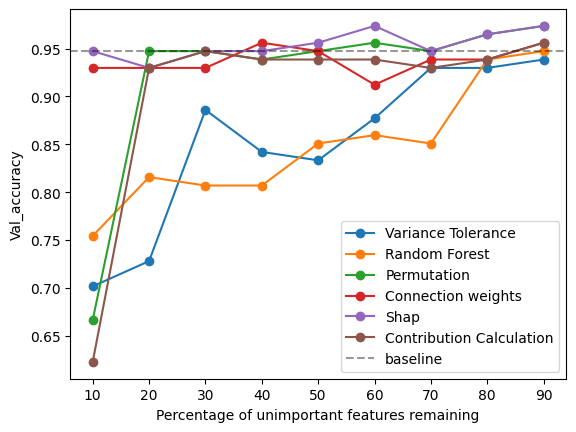

In [261]:
name_l = ['Variance Tolerance', 'Random Forest', 'Permutation', 'Connection weights', 'Shap', 'Contribution Calculation']

plt.style.use('default')
for i in range(6):
    plt.plot(k_x, k_all[i], 'o-', label=name_l[i])

plt.axhline(y = 0.9474, color='black', linestyle='--', label='baseline', alpha=0.4)
# plt.xlim(0,100)
plt.xlabel('Percentage of unimportant features remaining')
plt.ylabel('Val_accuracy')
plt.legend()


In [262]:
k_bar_all = []
for j in range(9):
    k_bar = []
    k_bar.append((j+1)*10)
    for i in range(6):
        k_bar.append(k_all[i][j])
    k_bar_all.append(k_bar)
k_bar_all

[[10,
  0.7017543911933899,
  0.7543859481811523,
  0.6666666865348816,
  0.9298245906829834,
  0.9473684430122375,
  0.6228070259094238],
 [20,
  0.7280701994895935,
  0.8157894611358643,
  0.9473684430122375,
  0.9298245906829834,
  0.9298245906829834,
  0.9298245906829834],
 [30,
  0.8859649300575256,
  0.8070175647735596,
  0.9473684430122375,
  0.9298245906829834,
  0.9473684430122375,
  0.9473684430122375],
 [40,
  0.8421052694320679,
  0.8070175647735596,
  0.9385964870452881,
  0.9561403393745422,
  0.9473684430122375,
  0.9385964870452881],
 [50,
  0.8333333134651184,
  0.8508771657943726,
  0.9473684430122375,
  0.9473684430122375,
  0.9561403393745422,
  0.9385964870452881],
 [60,
  0.8771929740905762,
  0.859649121761322,
  0.9561403393745422,
  0.9122806787490845,
  0.9736841917037964,
  0.9385964870452881],
 [70,
  0.9298245906829834,
  0.8508771657943726,
  0.9473684430122375,
  0.9385964870452881,
  0.9473684430122375,
  0.9298245906829834],
 [80,
  0.9298245906829834,


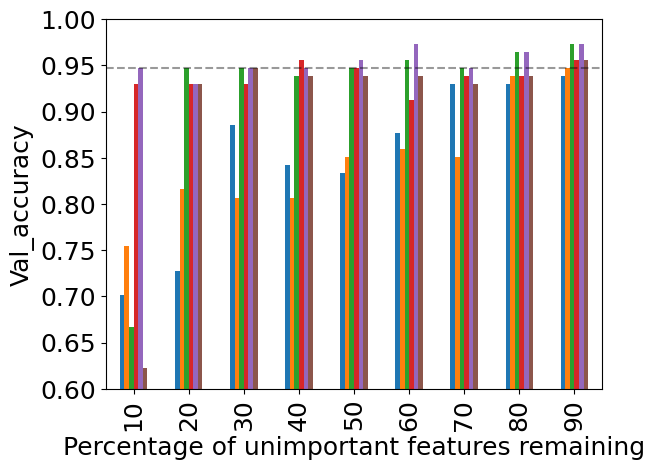

In [22]:
import pandas as pd

plt.style.use('default')

name_l = ['perc', 'Variance Tolerance', 'Random Forest', 'Permutation', 'Connection weights', 'Shap', 'Contribution Calculation']

df = pd.DataFrame(k_bar_all, columns=name_l)
ax = df.plot(x='perc', kind='bar', stacked=False, ylim=(0.6,1), legend=False)
ax.axhline(y = 0.9474, color='black', linestyle='--', alpha=0.4)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Percentage of unimportant features remaining', fontsize=18)
plt.ylabel('Val_accuracy', fontsize=18)
# plt.legend(bbox_to_anchor=(1, 1.02), fontsize=18)
plt.savefig('logistic_comparison.png', dpi = 300, bbox_inches='tight')

In [144]:
# Weight Calculation
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = base_model.evaluate(X, y, batch_size=10)
print("test loss, test acc:", results)

Evaluate on test data
57/57 [==============================] - 1s 2ms/step - loss: 0.1004 - accuracy: 0.9649
test loss, test acc: [0.10044198483228683, 0.9648506045341492]


In [145]:
# Baseline
array_aux = np.zeros((569, 30))
results = base_model.evaluate(array_aux, y, batch_size=10)

57/57 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.6274


In [146]:
# Individula contribution
single_contribution_set = []
for i in range(30):  
    aux_array = []
    array_aux = np.zeros((569, 30))
    array_aux[:, i] = X[:, i]
    results = base_model.evaluate(array_aux, y, batch_size=10)
    aux_array.append(results[0])
    aux_array.append(results[1])
    aux_array.append(labels[i]+' retained')
    single_contribution_set.append(aux_array)

57/57 [==============================] - 0s 715us/step - loss: 0.6788 - accuracy: 0.6274


In [147]:
# Set each feature to be 0 and calculate the drop of change as its contribution
# it is different from permutation method, providing permutation method results

contribution_set = []
for i in range(30):
    aux_array=[]
    array_aux = np.ones((569, 30))
    array_aux[:,i] = 0
    X_new = array_aux * X
    results_new = base_model.evaluate(X_new, y, batch_size=10)
    aux_array.append(results_new[0])
    aux_array.append(results_new[1])
#     aux_array.append(labels[i]+' removed')
    contribution_set.append(aux_array)
contribution_set

57/57 [==============================] - 0s 708us/step - loss: 0.1029 - accuracy: 0.9613


[[0.5021921992301941, 0.8189806938171387],
 [0.24347323179244995, 0.9244288206100464],
 [24.432283401489258, 0.3725834786891937],
 [4.55121374130249, 0.6695957779884338],
 [0.10434375703334808, 0.9595782160758972],
 [0.11380436271429062, 0.9595782160758972],
 [0.11432213336229324, 0.95782071352005],
 [0.1140524372458458, 0.9595782160758972],
 [0.10252191871404648, 0.9613356590270996],
 [0.10056599974632263, 0.9648506045341492],
 [0.09348740428686142, 0.9666081070899963],
 [0.1773778647184372, 0.927943766117096],
 [0.15002422034740448, 0.9560632705688477],
 [0.3588041067123413, 0.8927943706512451],
 [0.10075736790895462, 0.9648506045341492],
 [0.09973286092281342, 0.9648506045341492],
 [0.09844610095024109, 0.9630931615829468],
 [0.10097343474626541, 0.9648506045341492],
 [0.10020249336957932, 0.9648506045341492],
 [0.10021279007196426, 0.9648506045341492],
 [0.10086872428655624, 0.9648506045341492],
 [1.151044249534607, 0.8224955797195435],
 [1.2901325225830078, 0.8066783547401428],
 [

In [96]:
# Individual contribution of each single feature
# Compare this with permutation method
# Can be used to calculate feature interaction
contribution_set = np.round(contribution_set, 4)
for i in range(len(contribution_set)):
    contribution_set[i] = abs(contribution_set[i]-0.1004)
contribution_set

array([[4.01800e-01, 7.18600e-01],
       [1.43100e-01, 8.24000e-01],
       [2.43319e+01, 2.72200e-01],
       [4.45080e+00, 5.69200e-01],
       [3.90000e-03, 8.59200e-01],
       [1.34000e-02, 8.59200e-01],
       [1.39000e-02, 8.57400e-01],
       [1.37000e-02, 8.59200e-01],
       [2.10000e-03, 8.60900e-01],
       [2.00000e-04, 8.64500e-01],
       [6.90000e-03, 8.66200e-01],
       [7.70000e-02, 8.27500e-01],
       [4.96000e-02, 8.55700e-01],
       [2.58400e-01, 7.92400e-01],
       [4.00000e-04, 8.64500e-01],
       [7.00000e-04, 8.64500e-01],
       [2.00000e-03, 8.62700e-01],
       [6.00000e-04, 8.64500e-01],
       [2.00000e-04, 8.64500e-01],
       [2.00000e-04, 8.64500e-01],
       [5.00000e-04, 8.64500e-01],
       [1.05060e+00, 7.22100e-01],
       [1.18970e+00, 7.06300e-01],
       [3.86780e+00, 5.53400e-01],
       [6.60000e-03, 8.59200e-01],
       [6.89000e-02, 8.38100e-01],
       [5.67000e-02, 8.41600e-01],
       [2.49000e-02, 8.57400e-01],
       [1.53000e-02,

In [148]:
weights_output = np.zeros(np.shape(weights))
X_data = []
y_data = []
contribution_set = np.round(contribution_set, 4)
for j in range(len(weights)):
    for i in range(30):
        array_aux = np.ones((569, 30))
        array_aux[:,i] = 1-weights[j][i]
#         banchmark
        con_feature = contribution_set[i][0]
        X_new = array_aux * X
        results_new = base_model.evaluate(X_new, y, batch_size=10)
        results_round = np.round(results_new[0],4)
#         the loss change
        con = abs(0.1004-results_new[0])
#         weights_output[j][i] = con/con_feature
        
        weight = weights[j][i]
        weights_output[j][i] = con/con_feature

57/57 [==============================] - 0s 785us/step - loss: 0.1620 - accuracy: 0.9473


57/57 [==============================] - 0s 765us/step - loss: 0.1223 - accuracy: 0.9578


57/57 [==============================] - 0s 997us/step - loss: 0.0911 - accuracy: 0.9613


57/57 [==============================] - 0s 654us/step - loss: 0.0996 - accuracy: 0.9649


57/57 [==============================] - 0s 657us/step - loss: 0.1000 - accuracy: 0.9649


57/57 [==============================] - 0s 653us/step - loss: 0.9060 - accuracy: 0.8278


57/57 [==============================] - 0s 683us/step - loss: 0.1295 - accuracy: 0.9561


57/57 [==============================] - 0s 679us/step - loss: 0.1043 - accuracy: 0.9596


57/57 [==============================] - 0s 721us/step - loss: 0.1017 - accuracy: 0.9631


57/57 [==============================] - 0s 679us/step - loss: 0.1006 - accuracy: 0.9649


57/57 [==============================] - 0s 720us/step - loss: 0.2030 - accuracy: 0.9350


57/57 [==============================] - 0s 658us/step - loss: 0.1001 - accuracy: 0.9649


57/57 [==============================] - 0s 676us/step - loss: 0.2294 - accuracy: 0.9279


57/57 [==============================] - 0s 666us/step - loss: 0.1441 - accuracy: 0.9490


57/57 [==============================] - 0s 698us/step - loss: 0.0991 - accuracy: 0.9649


57/57 [==============================] - 0s 696us/step - loss: 0.1852 - accuracy: 0.9385


57/57 [==============================] - 0s 656us/step - loss: 0.1213 - accuracy: 0.9578


57/57 [==============================] - 0s 664us/step - loss: 0.0921 - accuracy: 0.9613


57/57 [==============================] - 0s 653us/step - loss: 0.0995 - accuracy: 0.9649


57/57 [==============================] - 0s 648us/step - loss: 0.1000 - accuracy: 0.9649


57/57 [==============================] - 0s 655us/step - loss: 0.8609 - accuracy: 0.8295


57/57 [==============================] - 0s 669us/step - loss: 0.1270 - accuracy: 0.9561


57/57 [==============================] - 0s 681us/step - loss: 0.1010 - accuracy: 0.9631


57/57 [==============================] - 0s 691us/step - loss: 0.1024 - accuracy: 0.9631


57/57 [==============================] - 0s 689us/step - loss: 0.1006 - accuracy: 0.9649


57/57 [==============================] - 0s 687us/step - loss: 0.2045 - accuracy: 0.9350


57/57 [==============================] - 0s 663us/step - loss: 0.1001 - accuracy: 0.9649


57/57 [==============================] - 0s 662us/step - loss: 0.2294 - accuracy: 0.9279


57/57 [==============================] - 0s 642us/step - loss: 0.1453 - accuracy: 0.9490


57/57 [==============================] - 0s 688us/step - loss: 0.0992 - accuracy: 0.9649


57/57 [==============================] - 0s 653us/step - loss: 0.1552 - accuracy: 0.9473


57/57 [==============================] - 0s 664us/step - loss: 0.1212 - accuracy: 0.9578


57/57 [==============================] - 0s 687us/step - loss: 0.0941 - accuracy: 0.9631


57/57 [==============================] - 0s 631us/step - loss: 0.0995 - accuracy: 0.9649


57/57 [==============================] - 0s 689us/step - loss: 0.1000 - accuracy: 0.9649


57/57 [==============================] - 0s 687us/step - loss: 0.8872 - accuracy: 0.8295


57/57 [==============================] - 0s 699us/step - loss: 0.1285 - accuracy: 0.9561


57/57 [==============================] - 0s 1ms/step - loss: 0.1047 - accuracy: 0.9596


57/57 [==============================] - 0s 2ms/step - loss: 0.1020 - accuracy: 0.9631


57/57 [==============================] - 0s 1ms/step - loss: 0.1006 - accuracy: 0.9649


57/57 [==============================] - 0s 694us/step - loss: 0.1953 - accuracy: 0.9350


57/57 [==============================] - 0s 710us/step - loss: 0.1001 - accuracy: 0.9649


57/57 [==============================] - 0s 654us/step - loss: 0.2394 - accuracy: 0.9262


57/57 [==============================] - 0s 661us/step - loss: 0.1409 - accuracy: 0.9490


57/57 [==============================] - 0s 685us/step - loss: 0.0992 - accuracy: 0.9649


57/57 [==============================] - 0s 675us/step - loss: 0.2345 - accuracy: 0.9279


57/57 [==============================] - 0s 669us/step - loss: 0.1221 - accuracy: 0.9578


57/57 [==============================] - 0s 673us/step - loss: 0.0911 - accuracy: 0.9613


57/57 [==============================] - 0s 654us/step - loss: 0.0995 - accuracy: 0.9649


57/57 [==============================] - 0s 676us/step - loss: 0.1000 - accuracy: 0.9649


57/57 [==============================] - 0s 689us/step - loss: 0.8837 - accuracy: 0.8295


57/57 [==============================] - 0s 742us/step - loss: 0.1292 - accuracy: 0.9561


57/57 [==============================] - 0s 676us/step - loss: 0.0997 - accuracy: 0.9649


57/57 [==============================] - 0s 661us/step - loss: 0.1016 - accuracy: 0.9631


57/57 [==============================] - 0s 637us/step - loss: 0.1006 - accuracy: 0.9649


57/57 [==============================] - 0s 679us/step - loss: 0.2003 - accuracy: 0.9350


57/57 [==============================] - 0s 673us/step - loss: 0.1001 - accuracy: 0.9649


57/57 [==============================] - 0s 712us/step - loss: 0.2308 - accuracy: 0.9279


57/57 [==============================] - 0s 714us/step - loss: 0.1454 - accuracy: 0.9490


57/57 [==============================] - 0s 680us/step - loss: 0.0992 - accuracy: 0.9649


57/57 [==============================] - 0s 685us/step - loss: 0.1841 - accuracy: 0.9402


57/57 [==============================] - 0s 682us/step - loss: 0.1215 - accuracy: 0.9578


57/57 [==============================] - 0s 671us/step - loss: 0.0915 - accuracy: 0.9613


57/57 [==============================] - 0s 682us/step - loss: 0.0995 - accuracy: 0.9649


57/57 [==============================] - 0s 685us/step - loss: 0.1000 - accuracy: 0.9649


57/57 [==============================] - 0s 662us/step - loss: 0.8850 - accuracy: 0.8295


57/57 [==============================] - 0s 695us/step - loss: 0.1267 - accuracy: 0.9561


57/57 [==============================] - 0s 678us/step - loss: 0.1053 - accuracy: 0.9596


57/57 [==============================] - 0s 668us/step - loss: 0.1017 - accuracy: 0.9631


57/57 [==============================] - 0s 653us/step - loss: 0.1006 - accuracy: 0.9649


57/57 [==============================] - 0s 672us/step - loss: 0.2017 - accuracy: 0.9350


57/57 [==============================] - 0s 705us/step - loss: 0.1000 - accuracy: 0.9649


57/57 [==============================] - 0s 704us/step - loss: 0.2356 - accuracy: 0.9262


57/57 [==============================] - 0s 702us/step - loss: 0.1422 - accuracy: 0.9490


57/57 [==============================] - 0s 682us/step - loss: 0.0992 - accuracy: 0.9649


57/57 [==============================] - 0s 731us/step - loss: 0.2123 - accuracy: 0.9297


57/57 [==============================] - 0s 657us/step - loss: 0.1216 - accuracy: 0.9578


57/57 [==============================] - 0s 842us/step - loss: 0.1013 - accuracy: 0.9613


57/57 [==============================] - 0s 797us/step - loss: 0.0979 - accuracy: 0.9649


57/57 [==============================] - 0s 702us/step - loss: 0.1005 - accuracy: 0.9649


57/57 [==============================] - 0s 697us/step - loss: 0.0985 - accuracy: 0.9649


57/57 [==============================] - 0s 699us/step - loss: 0.0990 - accuracy: 0.9649


In [153]:
weights_output = np.insert(weights_output, 0, np.ones(30), 0)
c = []
for i in range(30,245):
    pl, weights_contribution = lu(weights_output[0:i], permute_l=True)
    out = solve(weights_contribution, np.ones(30))
    out = out/out[-3]
    c.append(out)
c = np.array(c)